# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## **Importing necessary libraries**

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import pdist, cdist

# To perform k-means clustering, compute metric
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To perform PCA
from sklearn.decomposition import PCA

In [ ]:
# Library to help with statistical analysis
import scipy.stats as stats

# import the scipy package and check the version to be sure that the version is above 1.6.1 so that some updated functions do not throw error.
import scipy
scipy.__version__

'1.11.4'

## **Loading the dataset**

In [ ]:
# import drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

# read the data from file
df = pd.read_csv('/content/drive/MyDrive/DSBA - UTA/Project 7/stock_data.csv')

# copying data to another varaible to avoid any changes to original data
data = df.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

### **Displaying the first few & last few rows of the dataset**

In [ ]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


### **Checking the shape of the dataset**

In [ ]:
# View the shape of the Train dataset and count the number of rows and columns of the dataset
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 340 rows and 15 columns


**Observation:** There are 340 rows and 15 columns.

### **Checking the data types of the columns for the dataset**

In [ ]:
# Checking the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observation:** All of the above datatypes are as expected.

### **Checking for duplicate values**

In [ ]:
# Checking the for any duplicate records
df.duplicated().sum()

0

**Observation:** The dataset doesn't contain any duplicate values.

### **Checking for missing values**

In [ ]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Ticker Symbol                   0.0
Security                        0.0
GICS Sector                     0.0
GICS Sub Industry               0.0
Current Price                   0.0
Price Change                    0.0
Volatility                      0.0
ROE                             0.0
Cash Ratio                      0.0
Net Cash Flow                   0.0
Net Income                      0.0
Earnings Per Share              0.0
Estimated Shares Outstanding    0.0
P/E Ratio                       0.0
P/B Ratio                       0.0
dtype: float64

**Observation:** There are no missing records.

### **Statistical summary of the dataset**

In [ ]:
# Obtaining statistical summary of numerical and categorical data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


## **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### **Univariate analysis**

#### **Plotting histograms and boxplots for all the variables**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

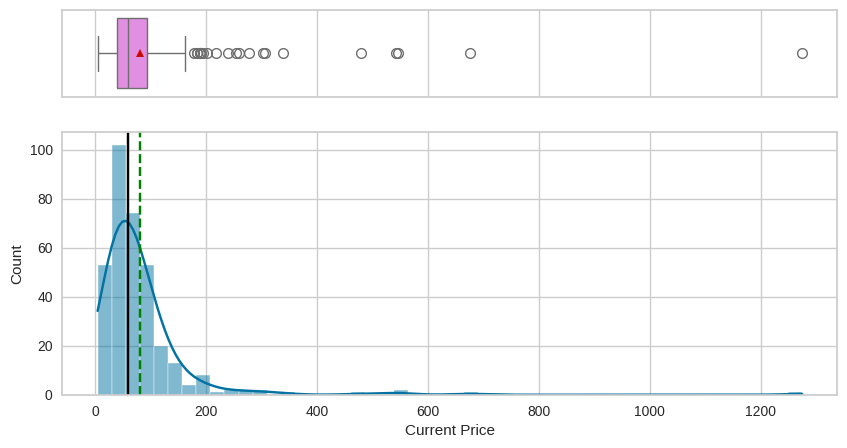

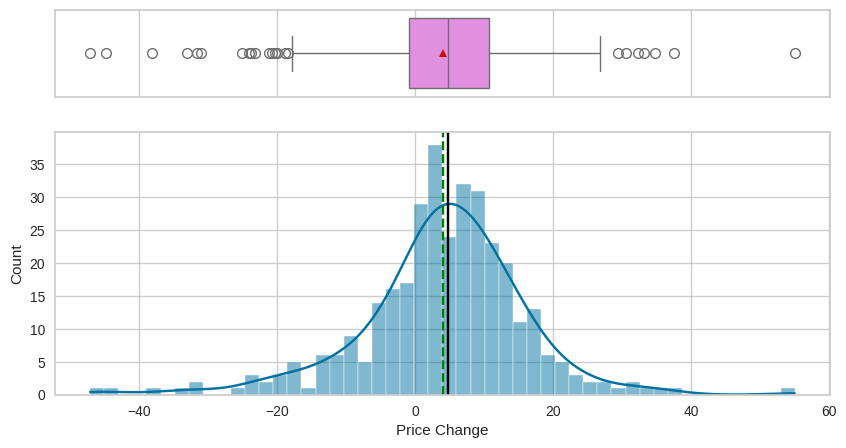

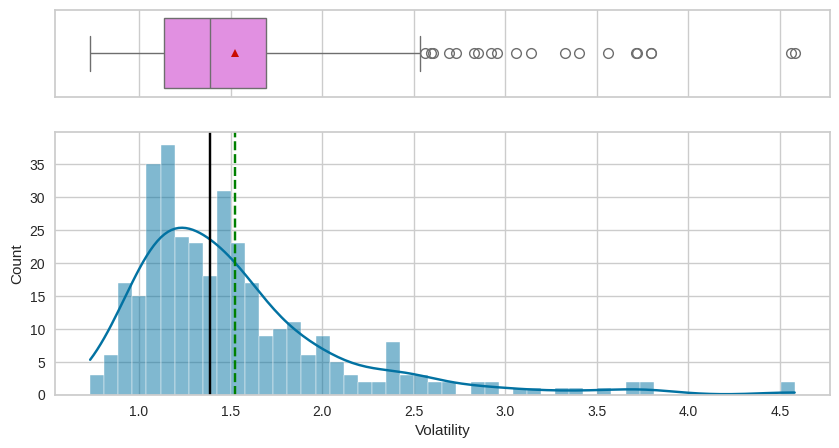

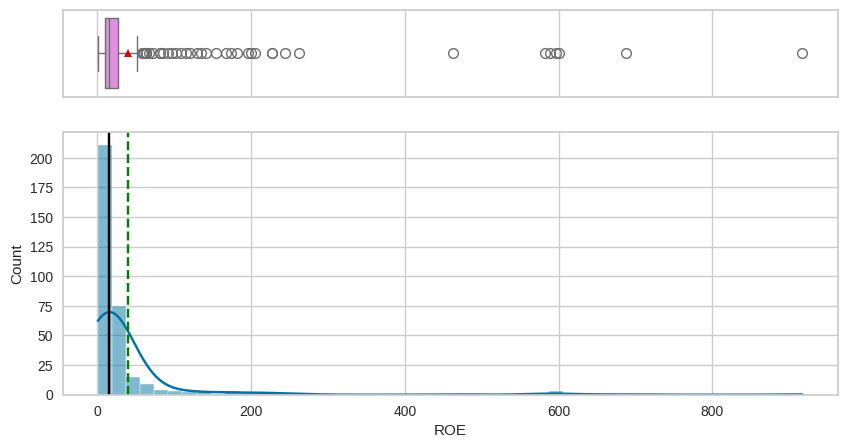

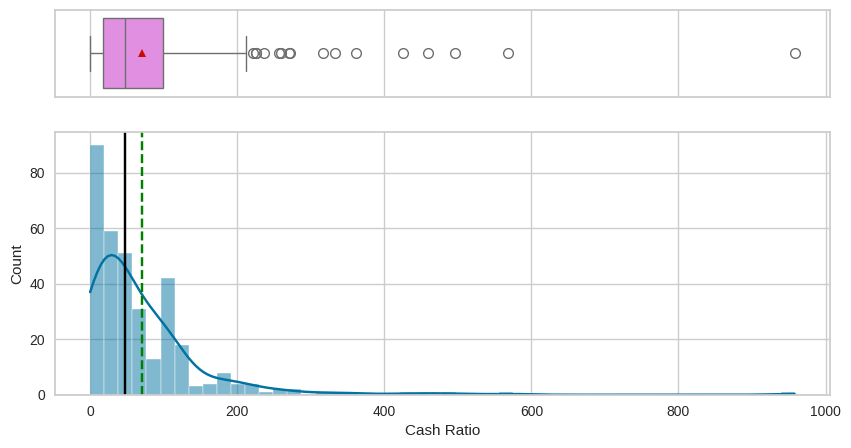

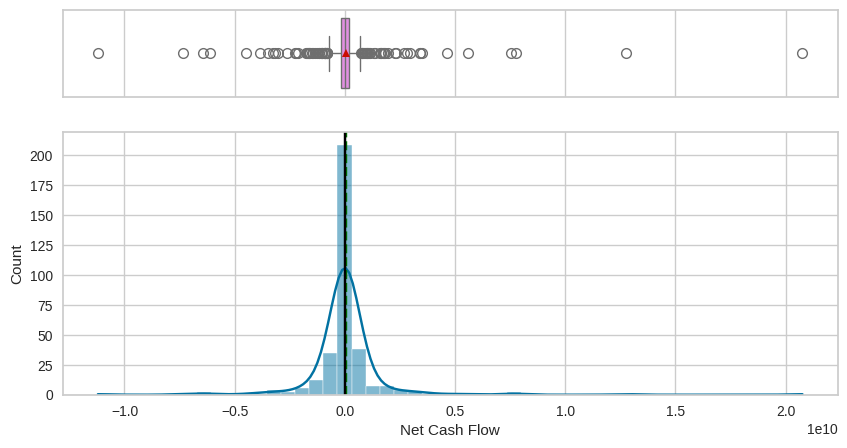

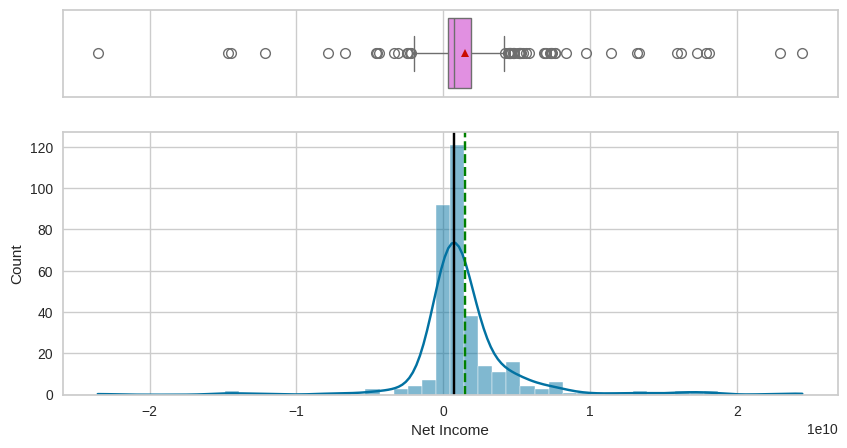

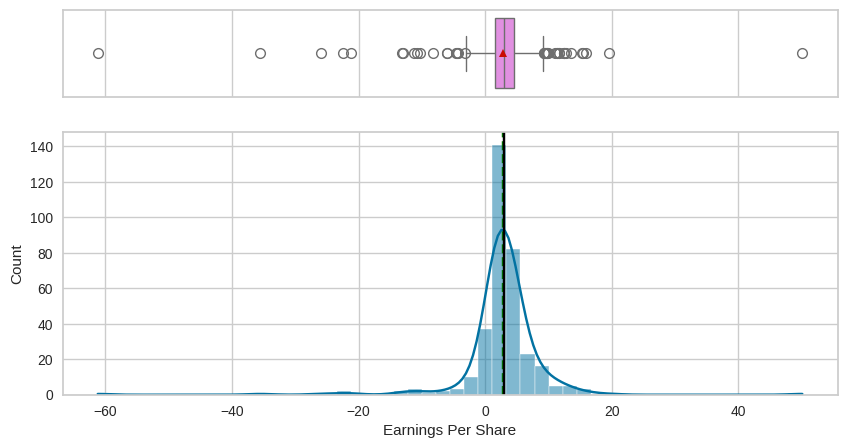

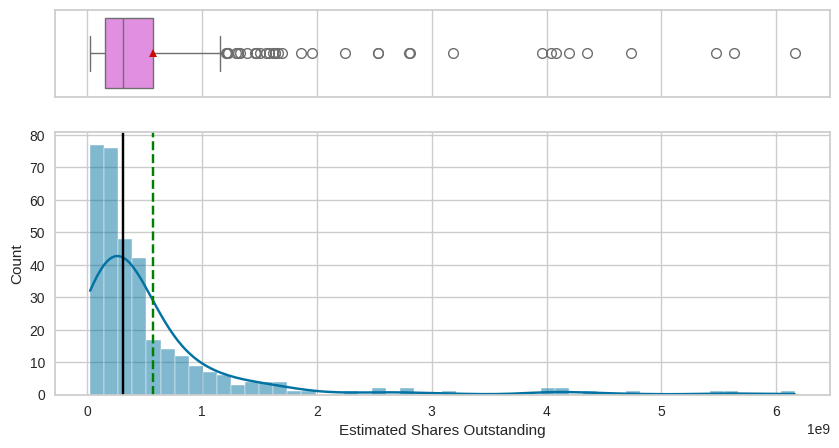

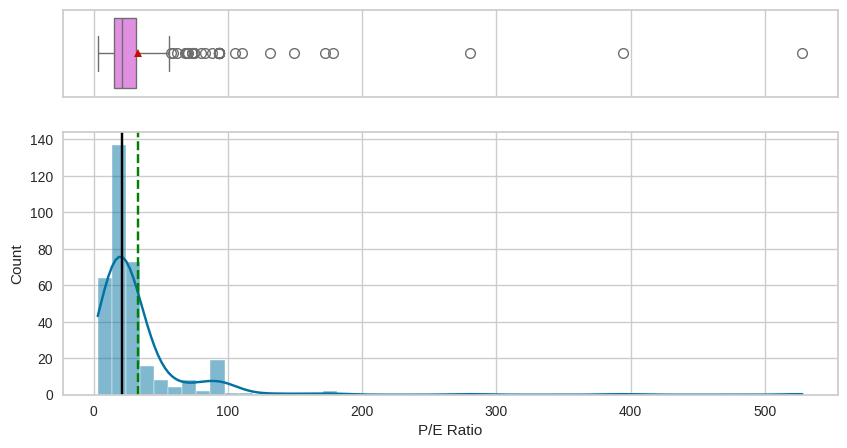

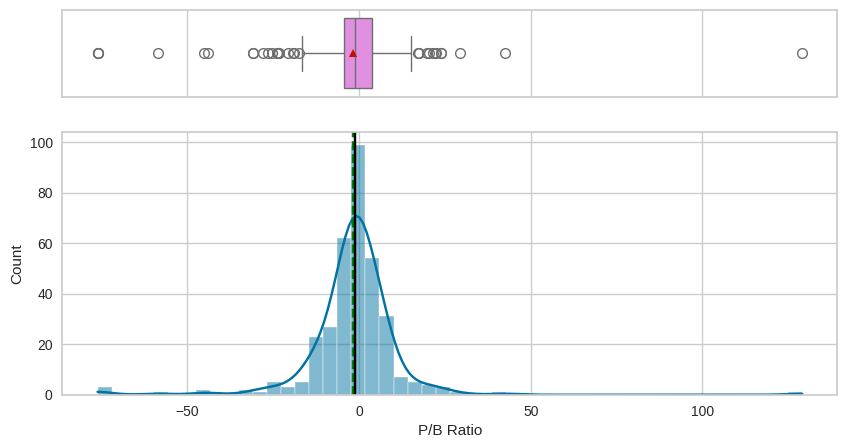

In [ ]:
# selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

**Observation:**
* **Stock Price/Current Price distribution is right-skewed having long right tail.**
* Some of the other metrics with right skewness are Volatility, ROE, Cash Ratio, Net Cash Flow, Estimated Shares Outstanding, P/E ratio and P/B ratio suggesting presence of outliers.
* We also see left-skewness within data for Net Income & EPS suggesting presence of outliers.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**1. GICS Sector**

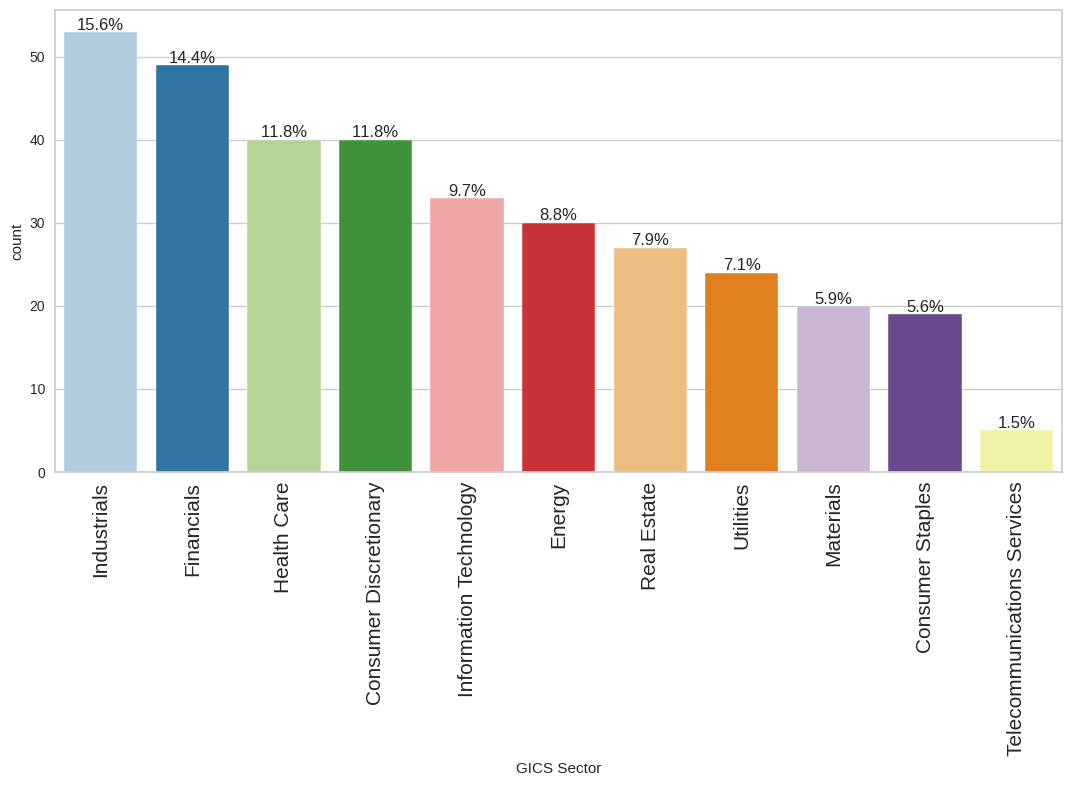

In [ ]:
labeled_barplot(data, "GICS Sector", perc=True)

**Observation:**
* Industrial, Financial & Healthcare sectors together make up about 42% of companies within the dataset.
* Industrials sector contributes to 15.6% of the companies.

**1. GICS Sub Industry**

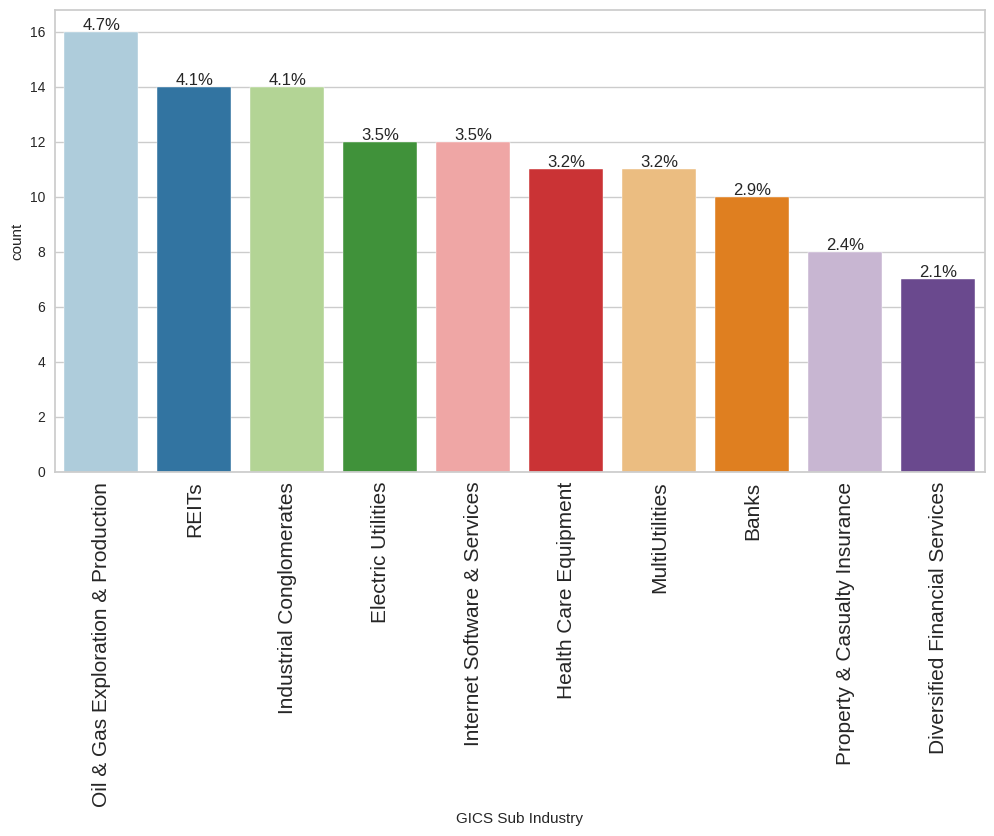

In [ ]:
labeled_barplot(data, "GICS Sub Industry", perc=True, n = 10)

**Observation:**
* Above is the top 10 chart of GICS sub industries represented within the dataset.
* 4.7% companies comprises of Oil and Gas Refining followed by 4.1% of REITs & Industrial Conglomerates, 3.5% of Internet Software and Services & Electric Utilities.


### **Bivariate Analysis**

#### **Lets check how are the different variables correlated with each other.**

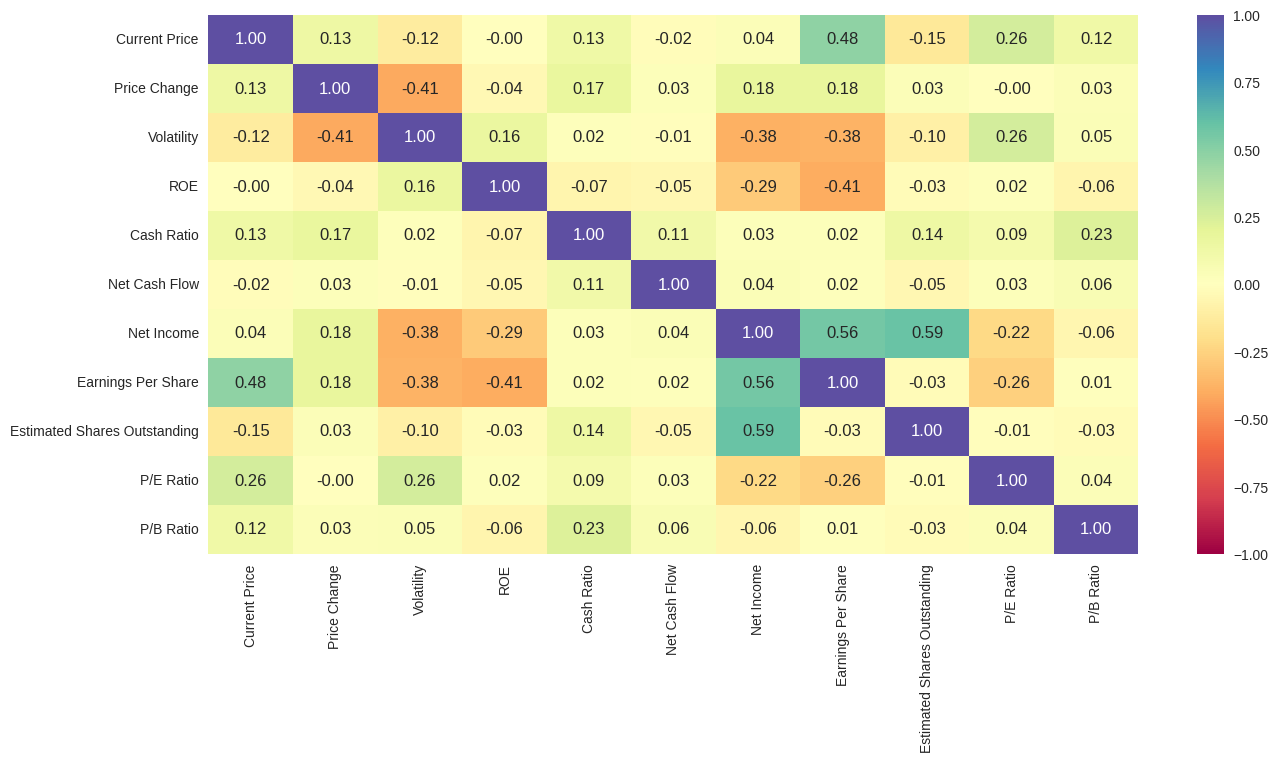

In [ ]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation:**
* Price Change has a negative correlation with Volatility. This indicates higher the volatililty of the stock, more sensitive the Price Change of the stock would be.
* Earnings Per Share has a positive correlation with Current Price & Net Income.
* Earnings Per Share has a negative correlation with ROE, Volatility & P/E ratio.
* Estimated Shares Outstanding has a positive correlation with Net Income.

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

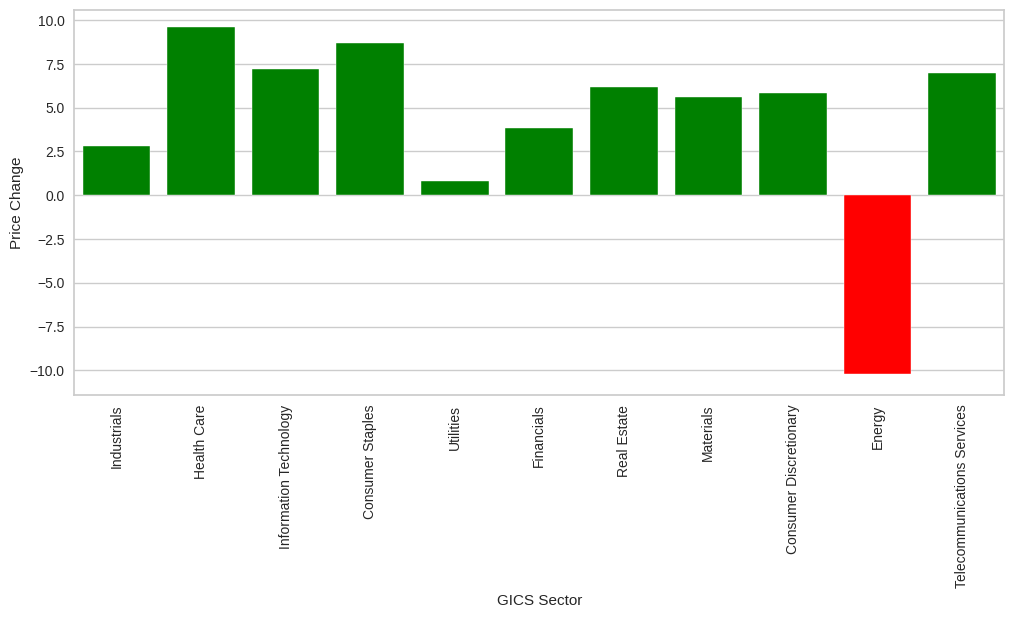

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=data,x='GICS Sector', y='Price Change', ci=False)
for bar in plt.gca().patches:
    if bar.get_height() > 0:
        bar.set_facecolor('green')
    else:
        bar.set_facecolor('red')
plt.xticks(rotation=90)
plt.show()

**Observation:** Healthcare sector followed by Consumer Staples, Information Technology & Telecommunication Services have seen the maximum price increase on an average.



**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

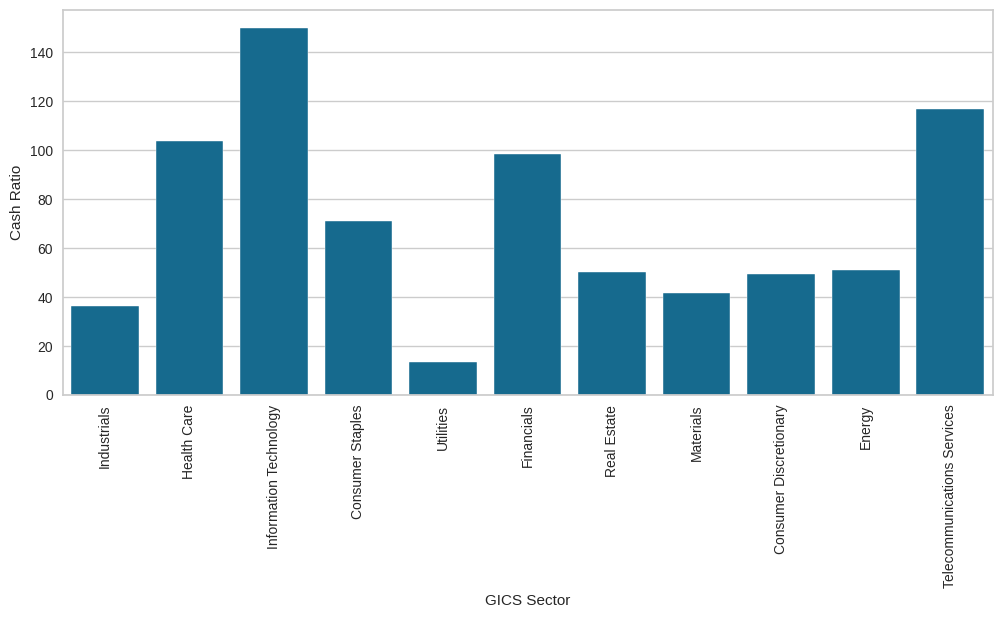

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

**Observation:** Information Technology & Telecommunication Services have the highest Cash Ratio and Utilites have the lowest across various sectors.


**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

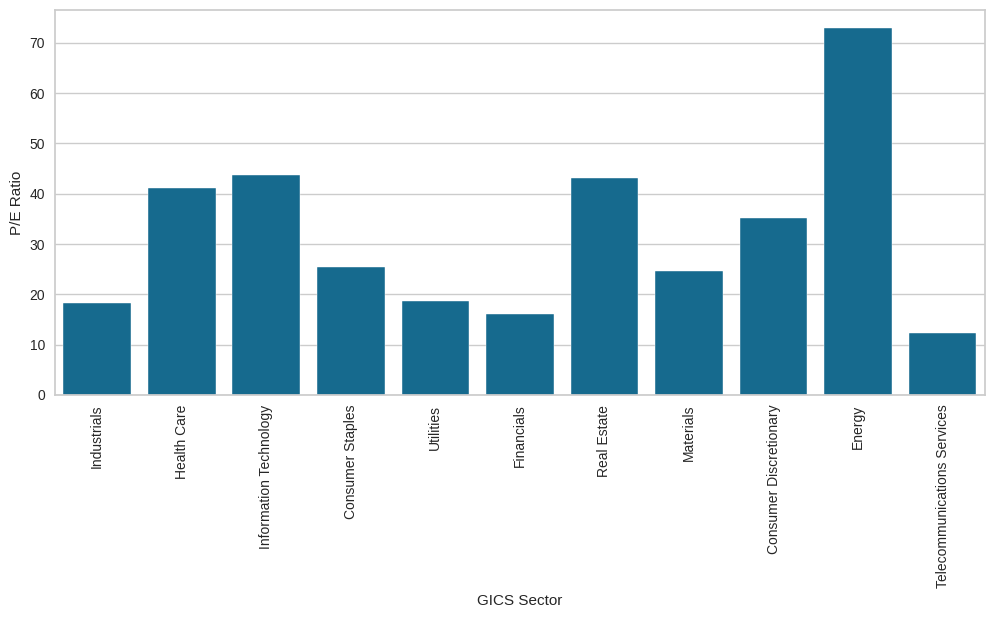

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

**Observation:** Energy stocks have the highest P/E ratio and Telecommunication Services have the lowest P/E ratio across various sectors.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

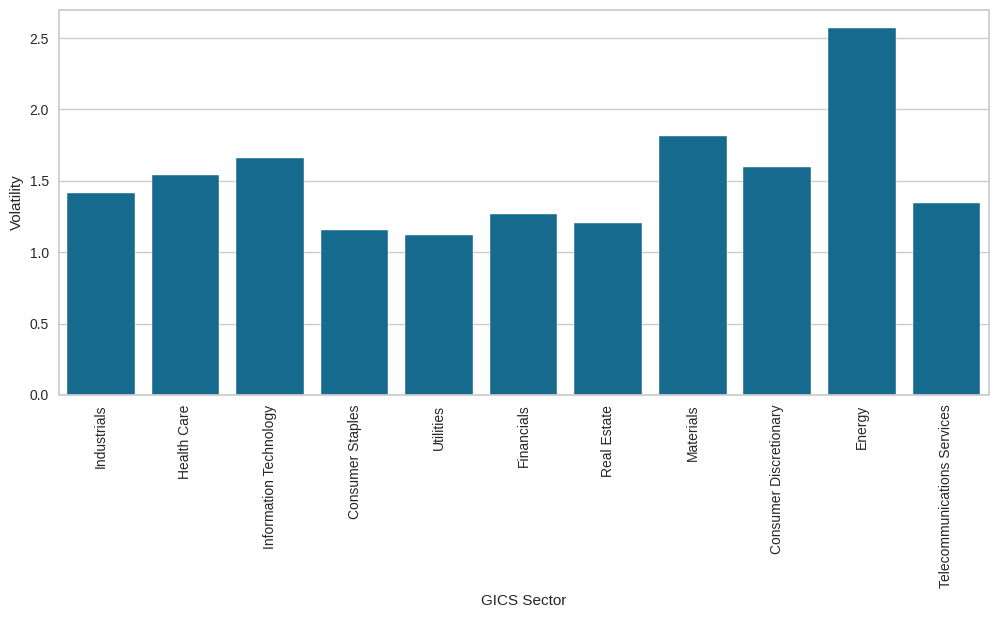

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

**Observation:** Energy sector followed by Materials and Information Technology have the highest volatility amongst other sectors.

**Net Income is Revenues minus expenses, interest, and taxes (in dollars). Let's see how Net Income is across various economic sectors**

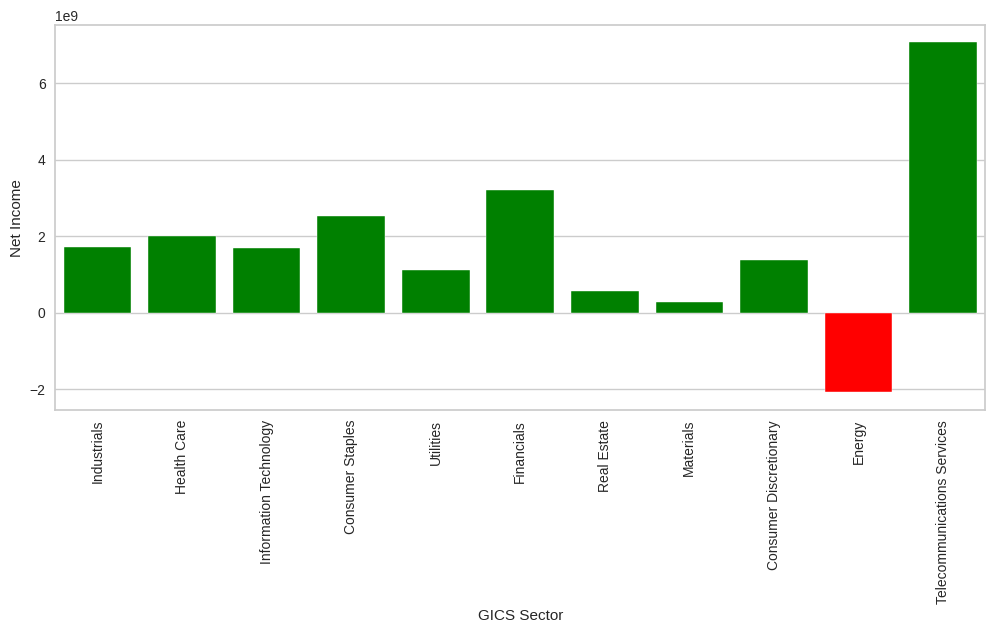

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='GICS Sector', y='Net Income', ci=False)
for bar in plt.gca().patches:
    if bar.get_height() > 0:
        bar.set_facecolor('green')
    else:
        bar.set_facecolor('red')
plt.xticks(rotation=90)
plt.show()

**Observation:** Energy sector has negative Net Income vs Telecommunication Services has the highest Net Income among various sectors.

**Estimated Shares Outstanding arepresents how much of company's stock is currently held by all its shareholders. Let's see how the Estimated Shares Outstanding are across various economic sectors**

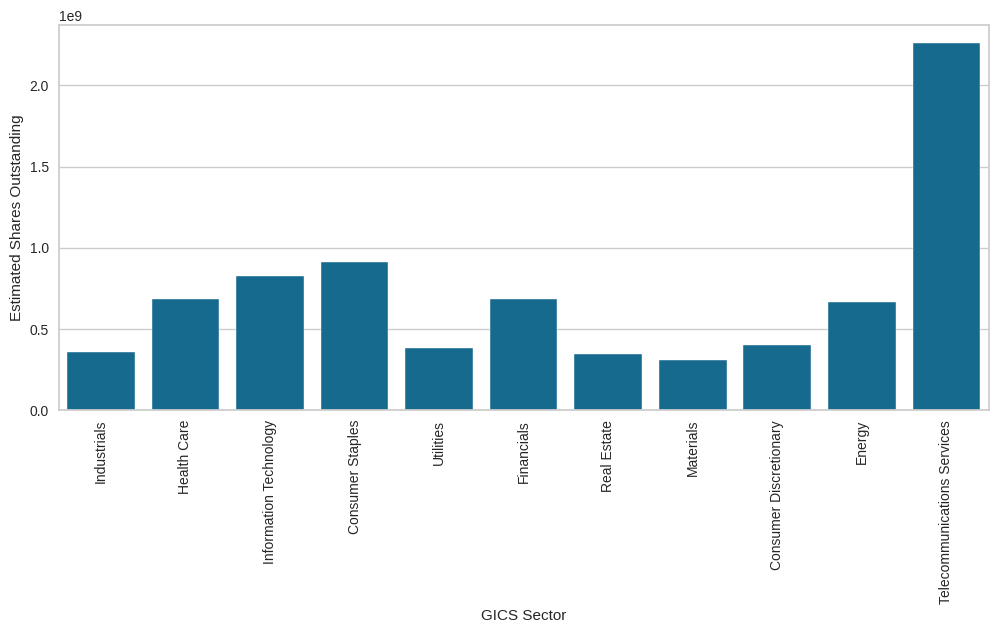

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='GICS Sector', y='Estimated Shares Outstanding', ci=False)
plt.xticks(rotation=90)
plt.show()

**Observation:** Telecommunication Services has the highest Estimated Shares Outstanding among various sectors.

## **Data Preprocessing**

### **Outlier Check**

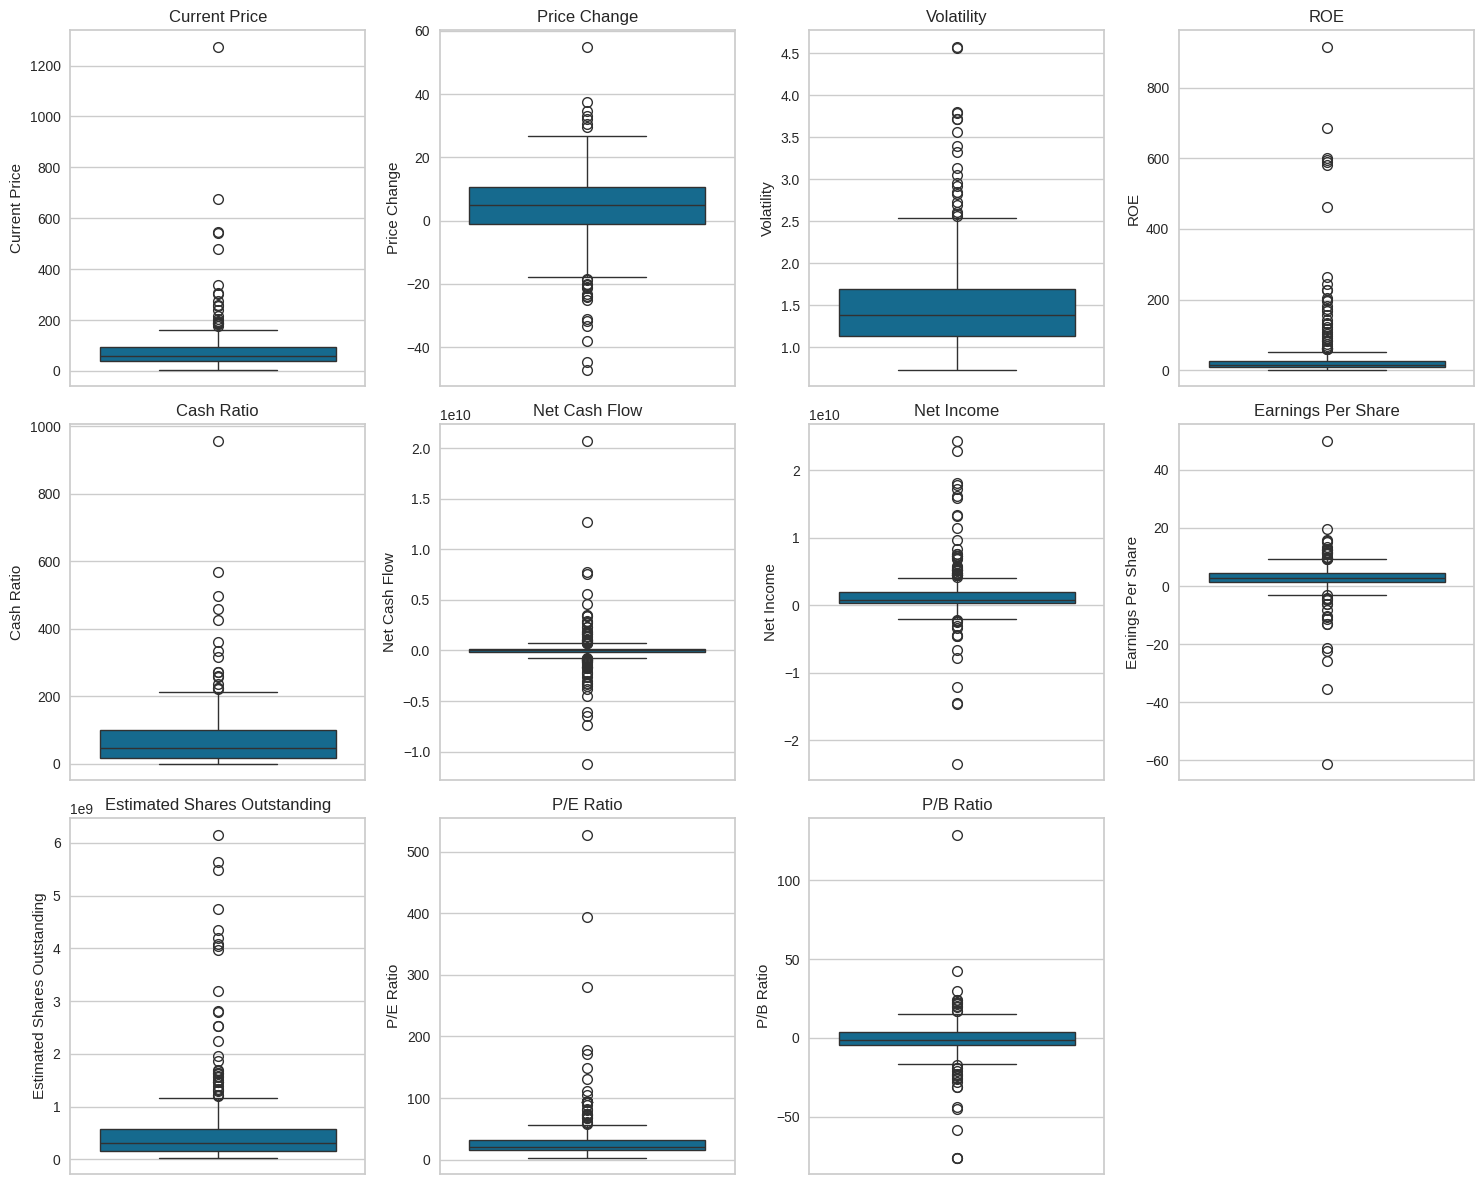

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation:**

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

### **Scaling**

* Let's scale the data before we proceed with clustering.

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df.iloc[:,4].copy() #data[num_cols].copy() --- first 4 columns are object datatypes and don't need scaling
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## **K-means Clustering**

### **Checking Elbow Plot**

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


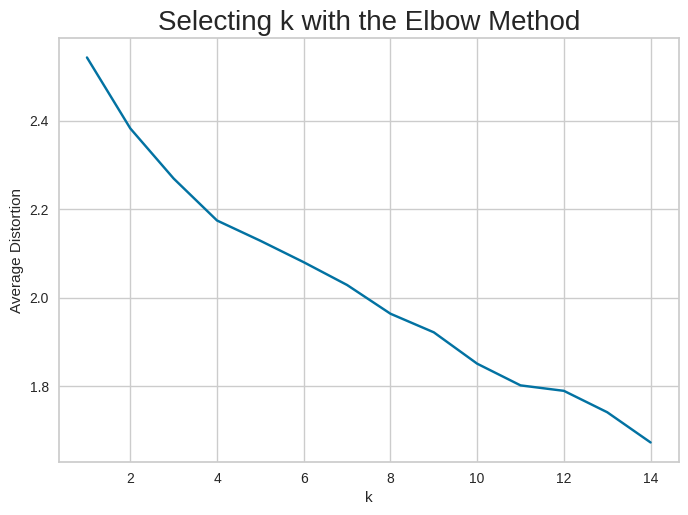

CPU times: user 1.41 s, sys: 133 ms, total: 1.54 s
Wall time: 947 ms


In [ ]:
%%time
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

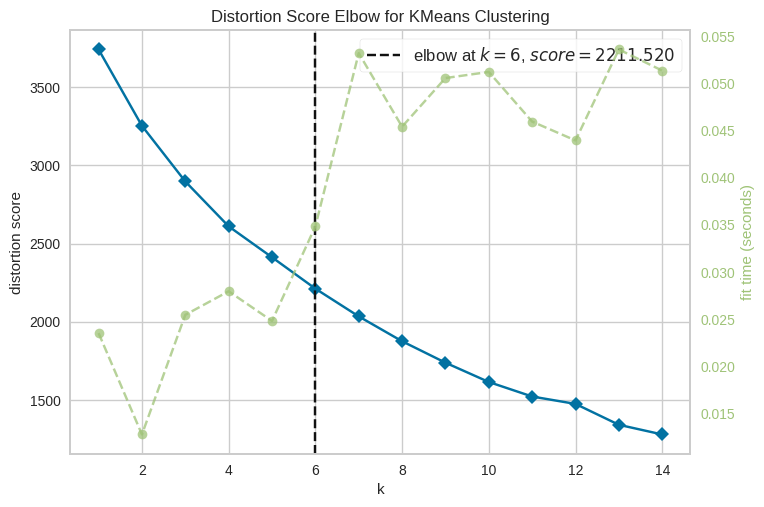

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Observation:** From elbow method, 2, 4 & 6 seems to be good approximates for number of clusters.



### **Let's check the silhouette scores**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


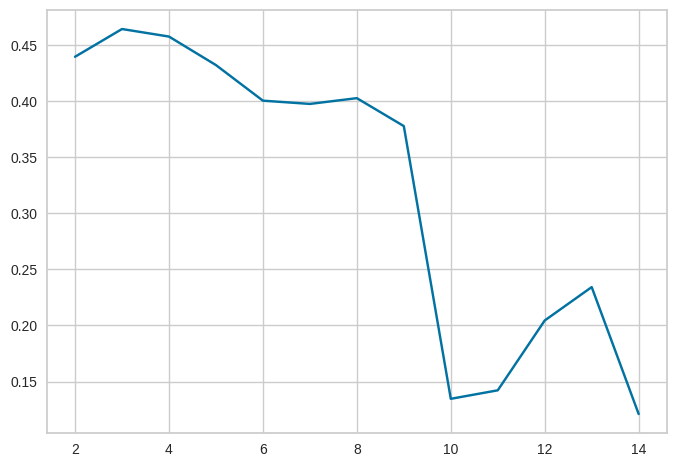

CPU times: user 2.82 s, sys: 1.17 s, total: 3.99 s
Wall time: 2.22 s


In [ ]:
%%time
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

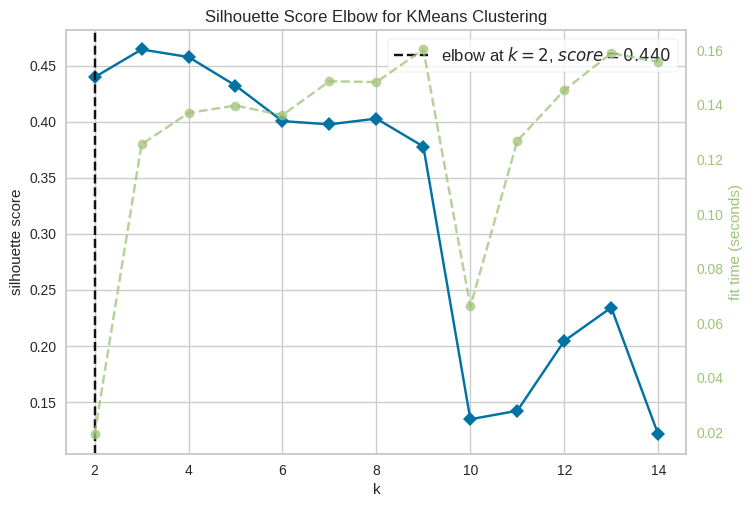

CPU times: user 3.15 s, sys: 1.14 s, total: 4.28 s
Wall time: 2.66 s


<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
%%time
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Observation:** From Silhouette score, 2, 3, 4, 5, 6 & 8 seems to be good approximates for number of clusters.



#### **Finding Optimal number of clusters using silhouette score**

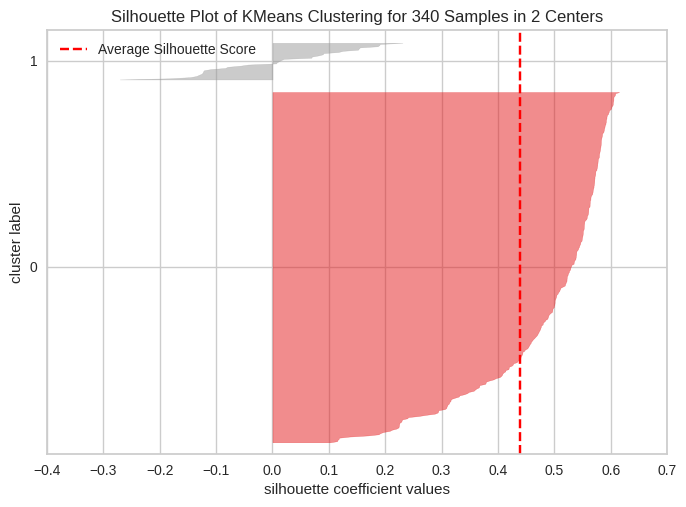

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

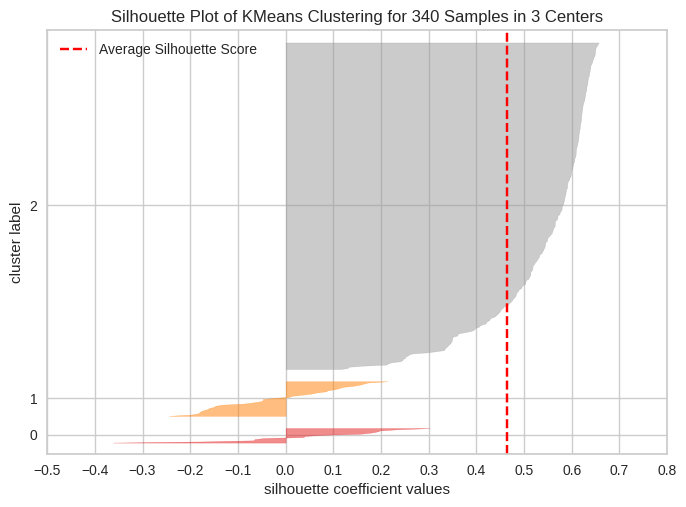

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

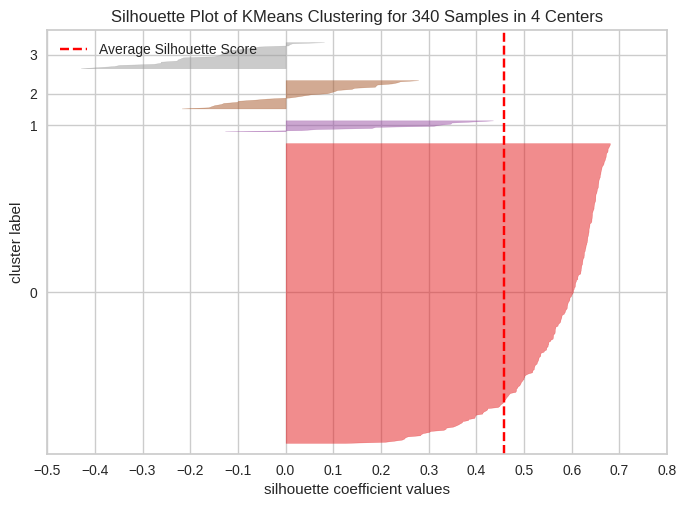

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

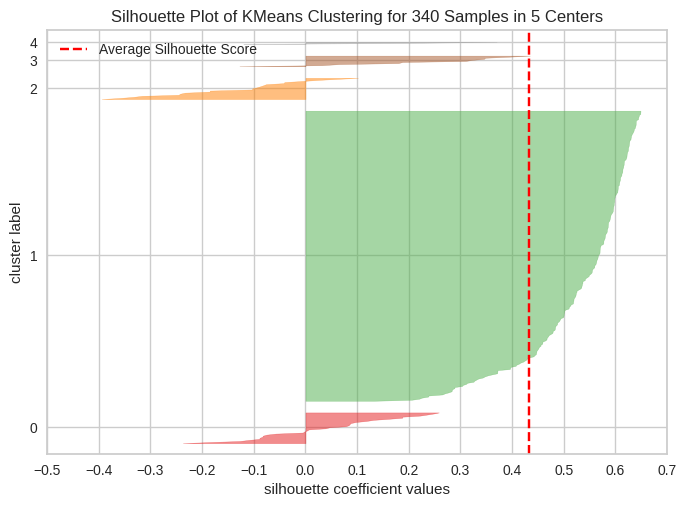

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

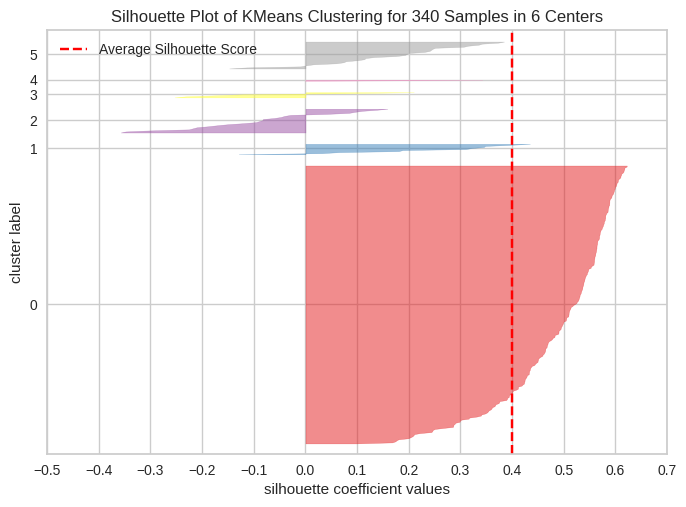

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

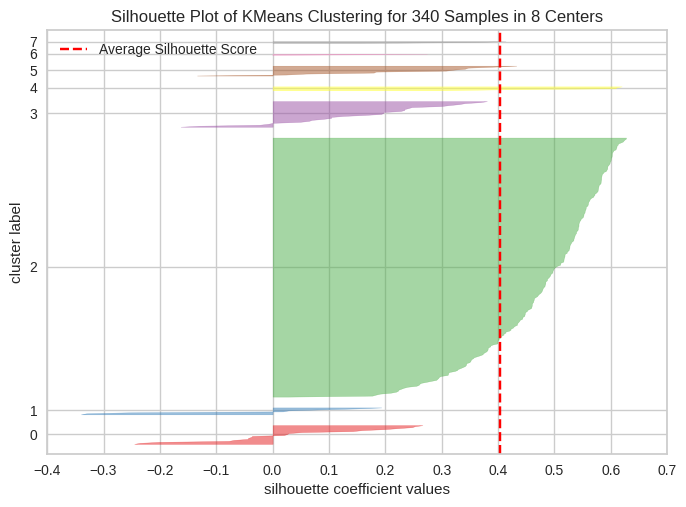

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Observation:**
When k=4 we have 1 big cluster and 3 smaller clusters of comparable size.

### **Creating Final Model with 4 clusters**

In [ ]:
# final K-means model
%%time
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_df)

CPU times: user 53.3 ms, sys: 930 µs, total: 54.2 ms
Wall time: 41 ms


KMeans(n_clusters=4, random_state=1)

In [ ]:
%%time
# creating a copy of the original data
df1 = data.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

CPU times: user 2.27 ms, sys: 0 ns, total: 2.27 ms
Wall time: 2.41 ms


### **Cluster Profiling**

In [ ]:
%%time
km_cluster_profile = df1.groupby("KM_segments").mean()  # code to groupby cluster labels

CPU times: user 3.31 ms, sys: 511 µs, total: 3.82 ms
Wall time: 4.96 ms


In [ ]:
%%time
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  # code to groupby cluster labels
)

CPU times: user 2.44 ms, sys: 0 ns, total: 2.44 ms
Wall time: 3.01 ms


In [ ]:
%%time
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

CPU times: user 250 ms, sys: 3.16 ms, total: 253 ms
Wall time: 256 ms


,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [ ]:
%%time
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [ ]:
%%time
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

CPU times: user 2.29 ms, sys: 0 ns, total: 2.29 ms
Wall time: 2.3 ms


KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

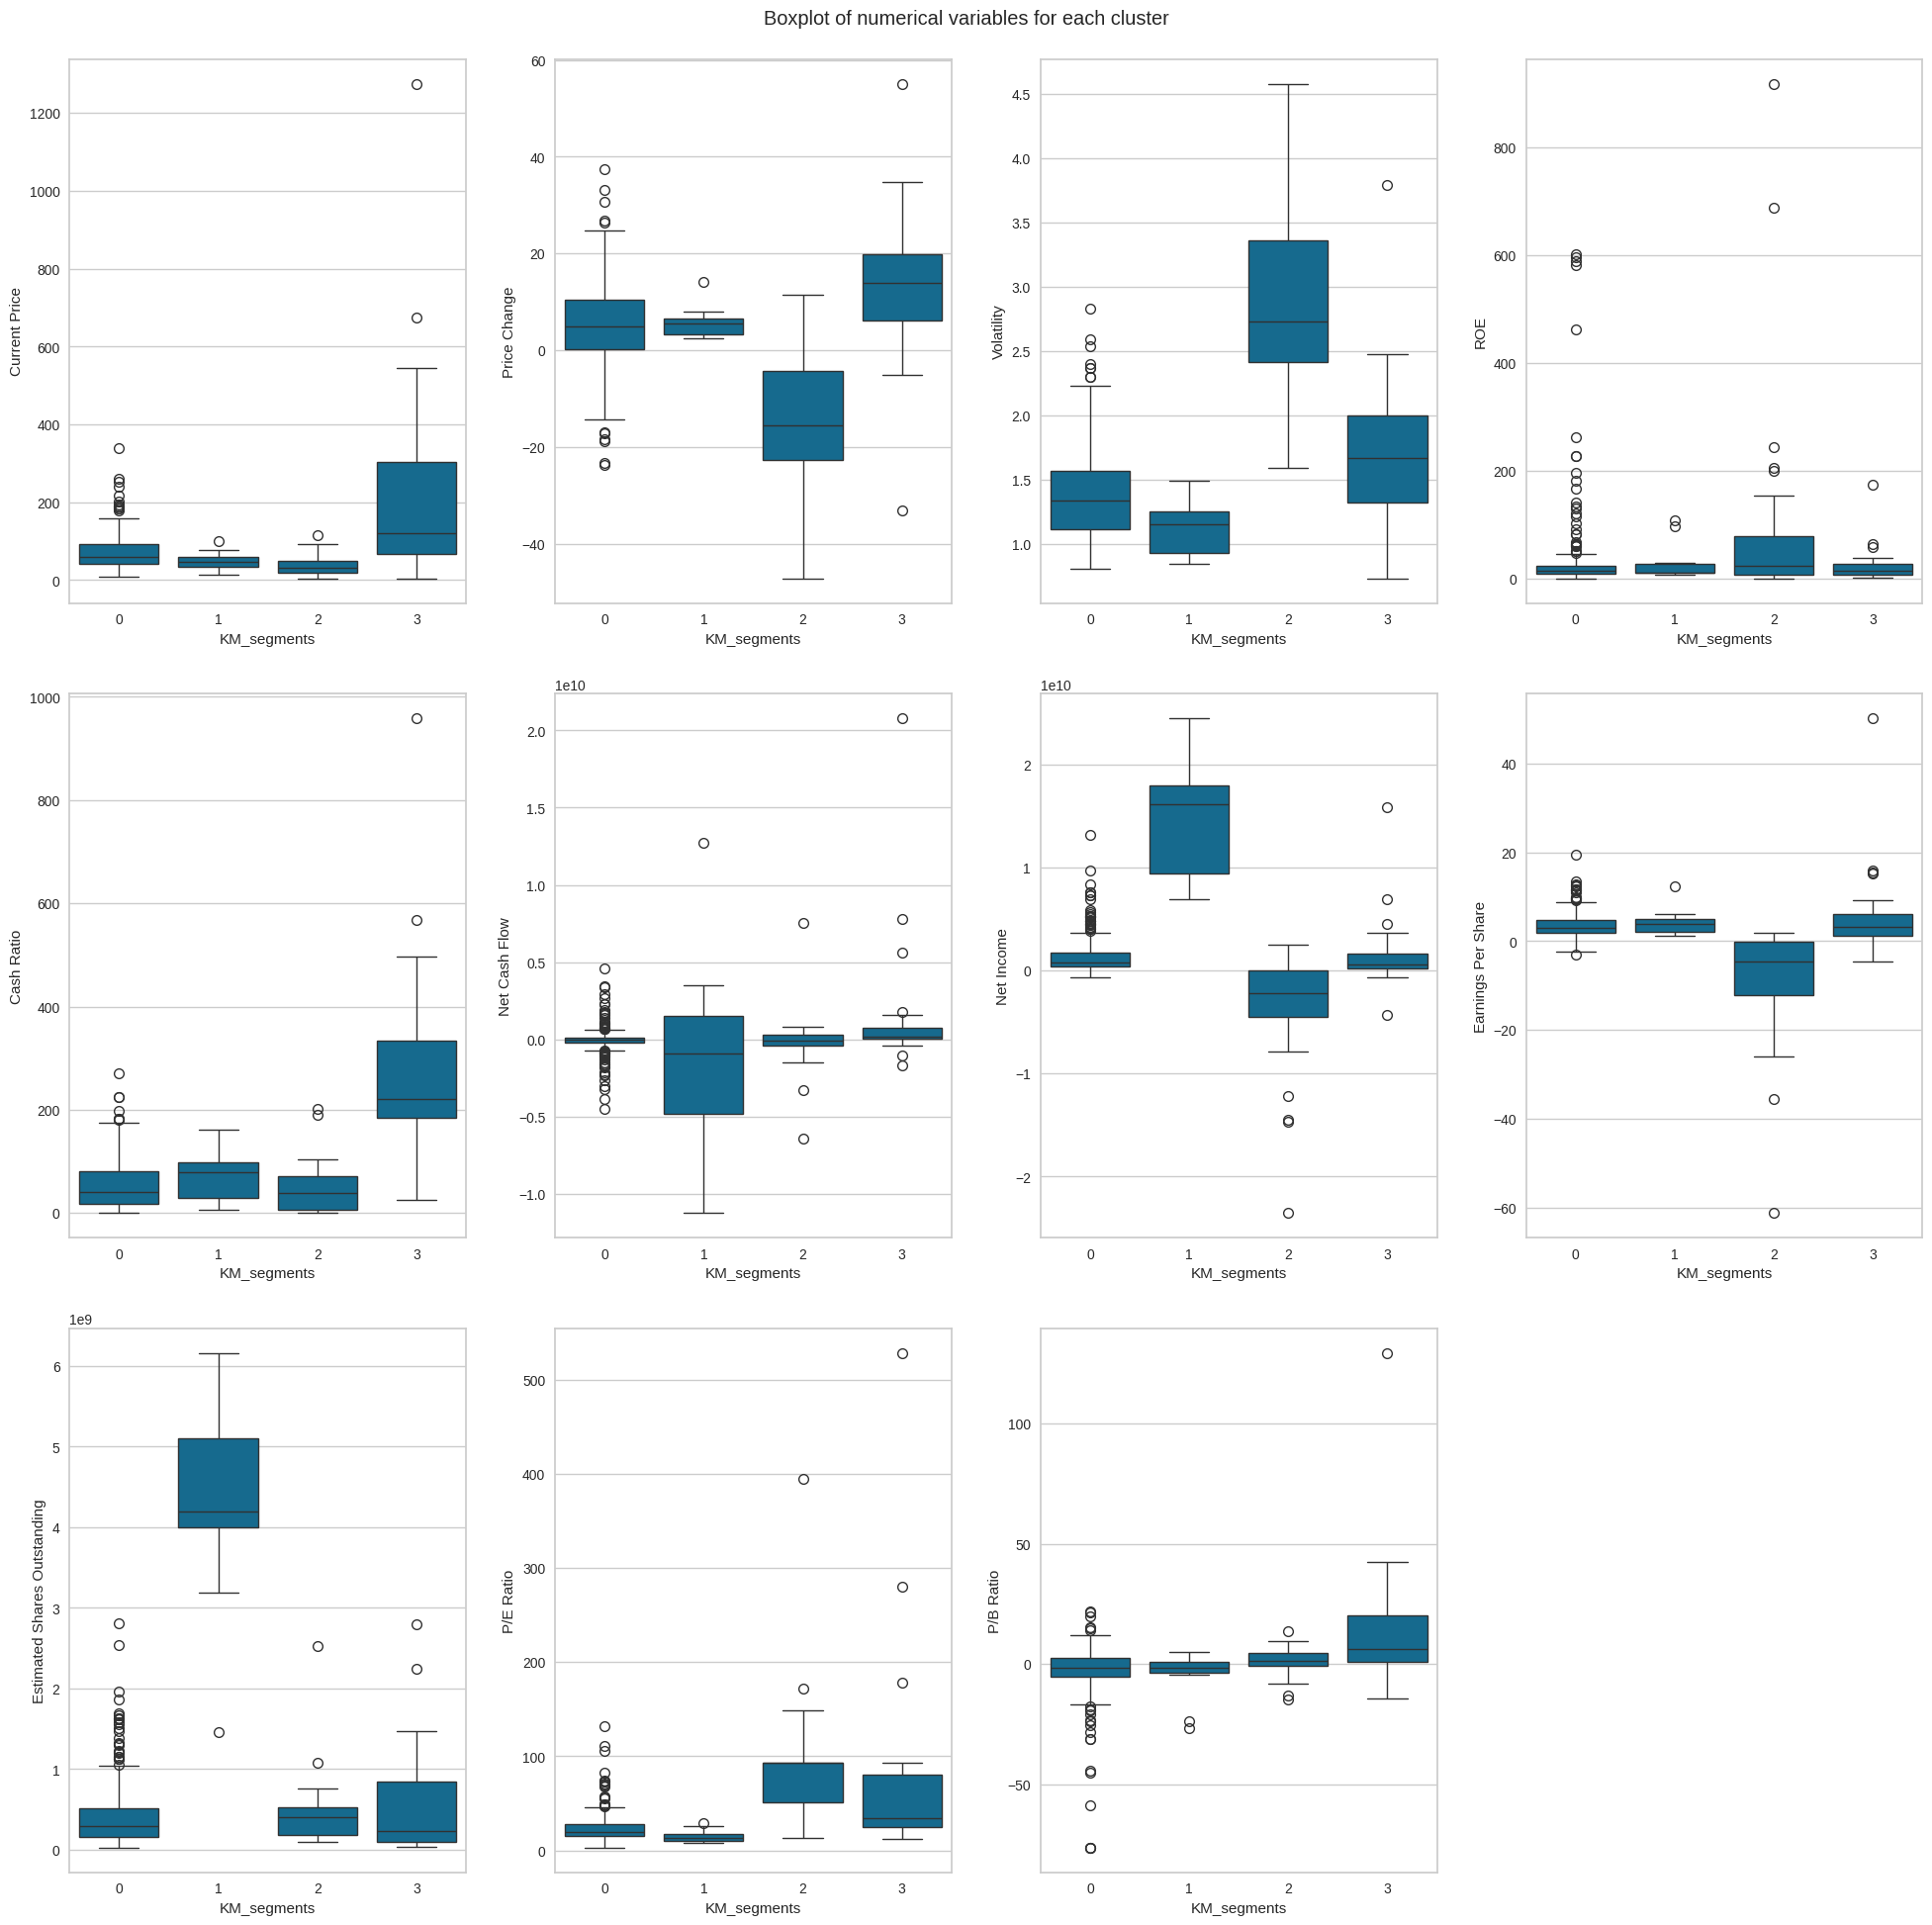

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

**Observation:**
*****************************************************************************
**Cluster 0:** **Bonds Investment**

Has about 277 different securities with majority of the portfolio in Industrias, Financials, Consumer Discretionary & Healthcare sector companies. This cluster has huge diversification (~81% of the total securities) and with outliers present in all different segments. **This doesn't seem to be a good portfolio of securites for investors needing a specific investment strategy. This may be ideal for first time investors lacking Stock Market/Investement knowledge and would like to invest in bonds.**

*******************************************************************************
**Cluster 1:** **Retirement Investment**

Has about 11 different securities with majority of the portfolio in Financials, Healthcare and Telecommunications Services sector companies. This cluster has securities with the low Current Stock Price, lowest Volatility, lowest ROE, negative Net Cash Flow & highest Net Income & Estimated Shares Outstanding making them an **Hence, this might be an ideal strategy for long-term investment risk free investors and not so attractive investment for short-term fast money making investors.**

*******************************************************************************
**Cluster 2:** **Penny Stocks Investment**

Has about 27 different securities with majority of the portfolio in the Energy sector. This cluster has securities with the highest ROE & P/E ratio. Has the lowest average Current Price of securities within other investement portfolio along with highest Volatility, highest negative Price Change, negative Net Income & negative Earnings Per Share. **This might be an ideal strategy for Penny stock investors, who don't look to invest much into the company but more into the price point and hope for miracles.**

*****************************************************************************
**Cluster 3:** **Long-Term Investment**

Has about 25 different securities with majority of the portfolio in Healthcare, Consumer Discretionary & Information Technology sector companies. This cluster has securities with the highest Current Price, Cash Ratio, Earnings Per Share & P/B ratio and high positive Price Change in last 13 weeks making them an **attractive investement strategy for investors who would like to invest in high performance, stable growth driven companies. This may not be so ideal for first time investors as the high Current Price for the security might put them off.**
*****************************************************************************

## **Hierarchical Clustering**

### **Computing Cophenetic Correlation**

In [ ]:
%%time
hc_df = subset_scaled_df.copy()

CPU times: user 174 µs, sys: 26 µs, total: 200 µs
Wall time: 205 µs


In [ ]:
%%time
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
%%time
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.
CPU times: user 54 ms, sys: 34.2 ms, total: 88.2 ms
Wall time: 59 ms


**Observation:** We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

### **Checking Dendrograms**

CPU times: user 3.66 s, sys: 87 ms, total: 3.75 s
Wall time: 3.72 s


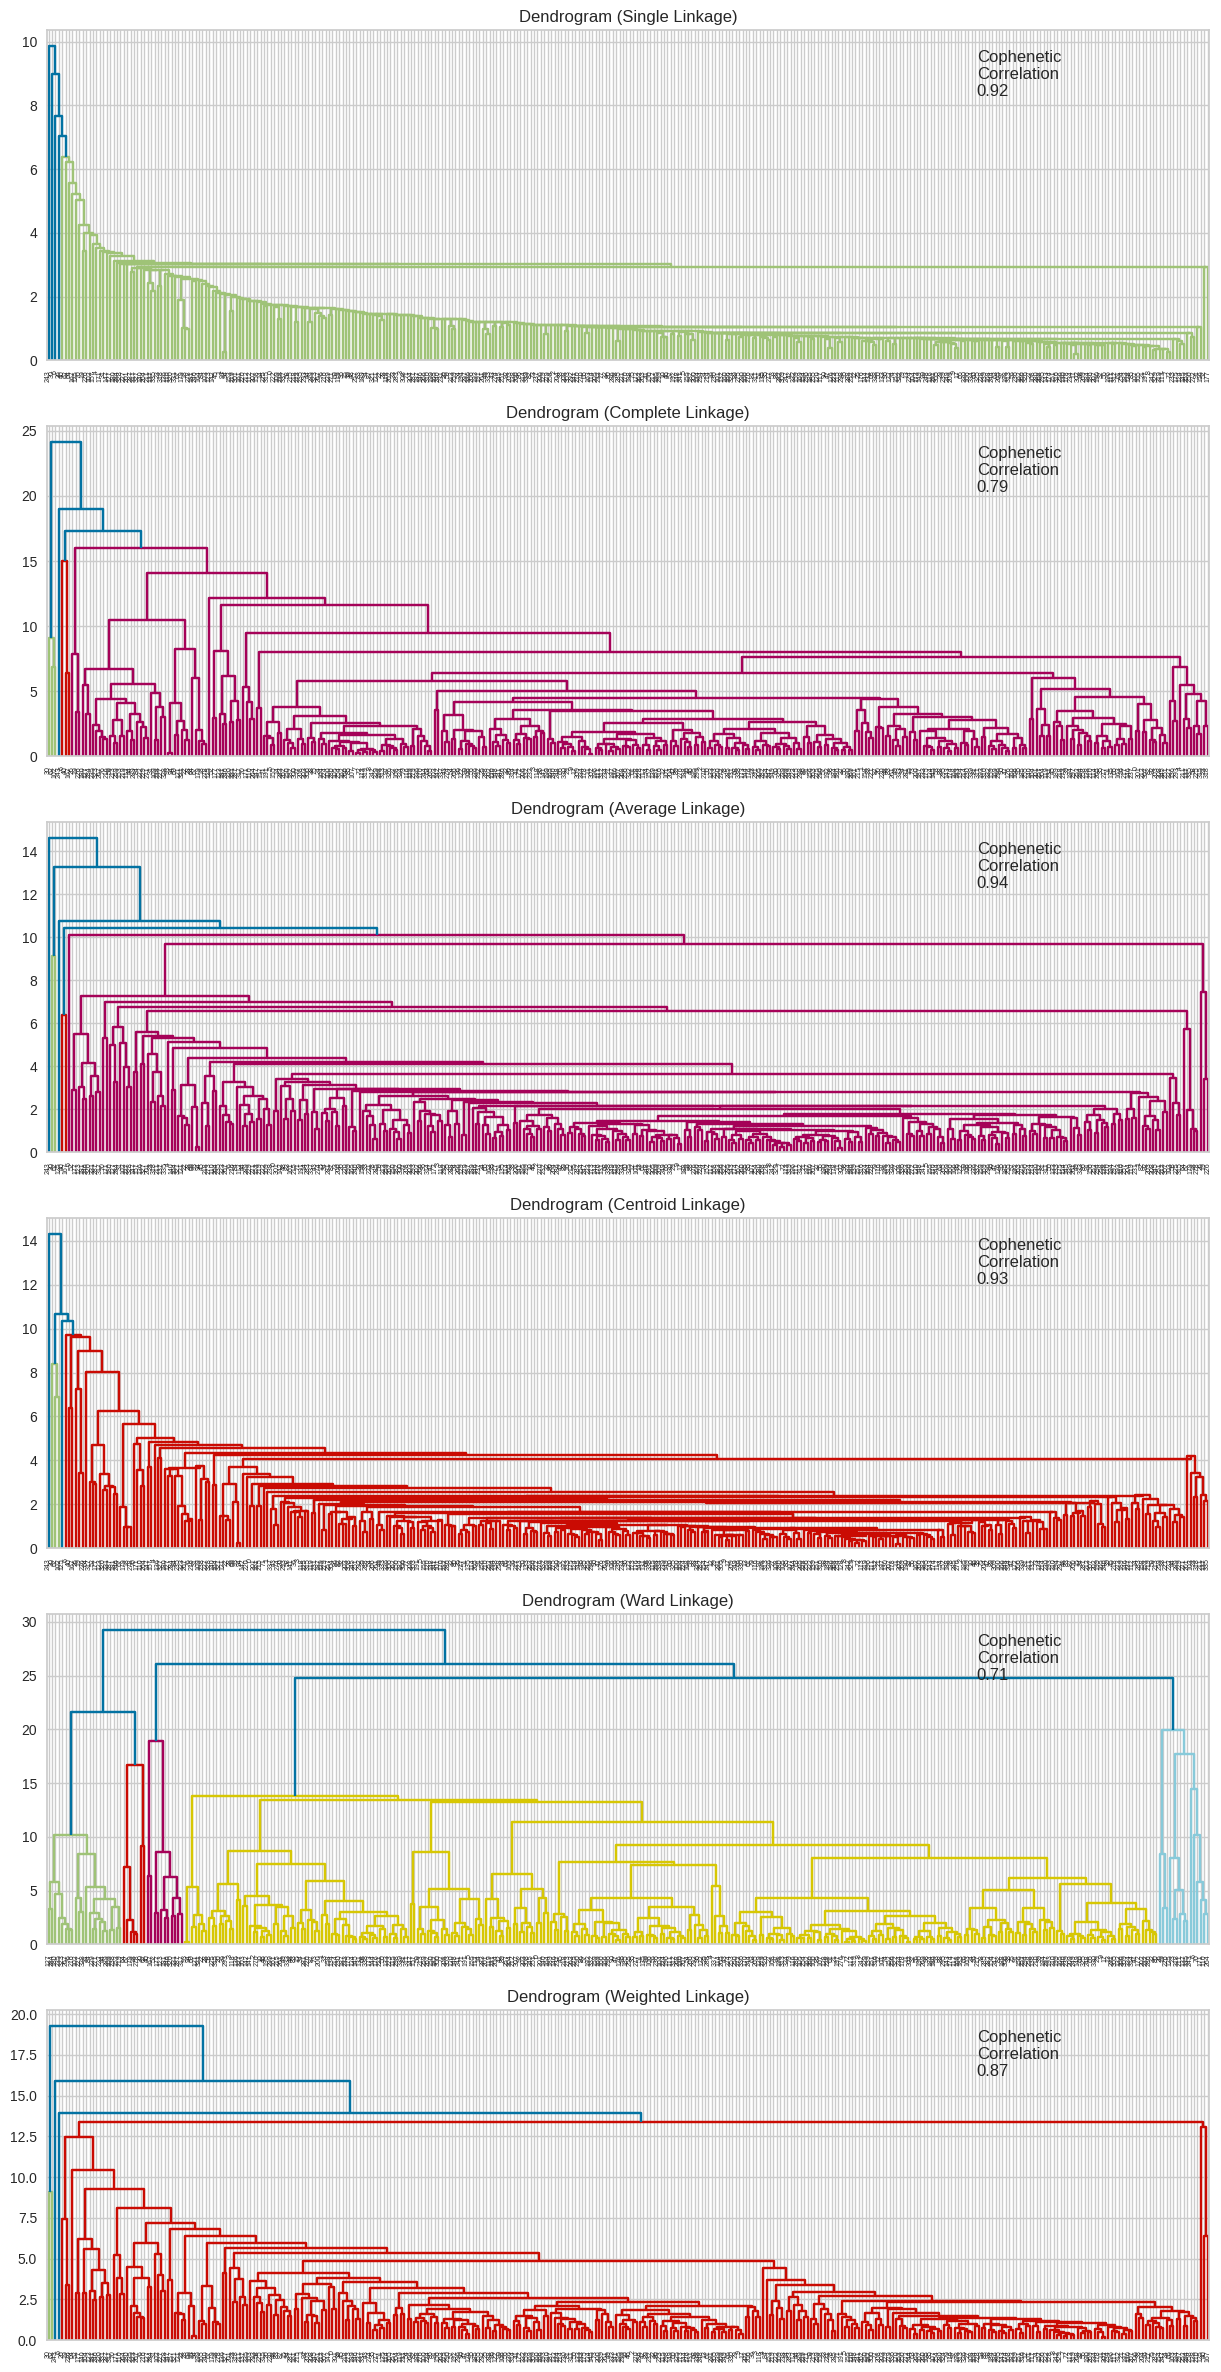

In [ ]:
%%time
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
%%time
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

CPU times: user 1.88 ms, sys: 0 ns, total: 1.88 ms
Wall time: 1.89 ms


,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


**Observations**

* The cophenetic correlation is highest for average and centroid linkage methods.
* We will move ahead with average linkage.
* 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### **Creating model using sklearn**

In [ ]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
HCmodel.fit(hc_df)

CPU times: user 7.67 ms, sys: 0 ns, total: 7.67 ms
Wall time: 11.9 ms


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [ ]:
%%time
# creating a copy of the original data
df2 = data.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

CPU times: user 1.24 ms, sys: 25 µs, total: 1.26 ms
Wall time: 1.28 ms


### **Cluster Profiling**

In [ ]:
%%time
hc_cluster_profile = df2.groupby("HC_segments").mean()

CPU times: user 4.51 ms, sys: 69 µs, total: 4.58 ms
Wall time: 4.71 ms


In [ ]:
%%time
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

CPU times: user 2.81 ms, sys: 0 ns, total: 2.81 ms
Wall time: 2.68 ms


In [ ]:
%%time
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

CPU times: user 258 µs, sys: 0 ns, total: 258 µs
Wall time: 252 µs


,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293544,32.441706,-2.174921,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1


In [ ]:
%%time
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

In [ ]:
%%time
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

CPU times: user 2.09 ms, sys: 0 ns, total: 2.09 ms
Wall time: 2.24 ms


HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         30
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Financials                      1
             Information Technology          1
2            Energy                          2
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
Name: Security, dtype: int64

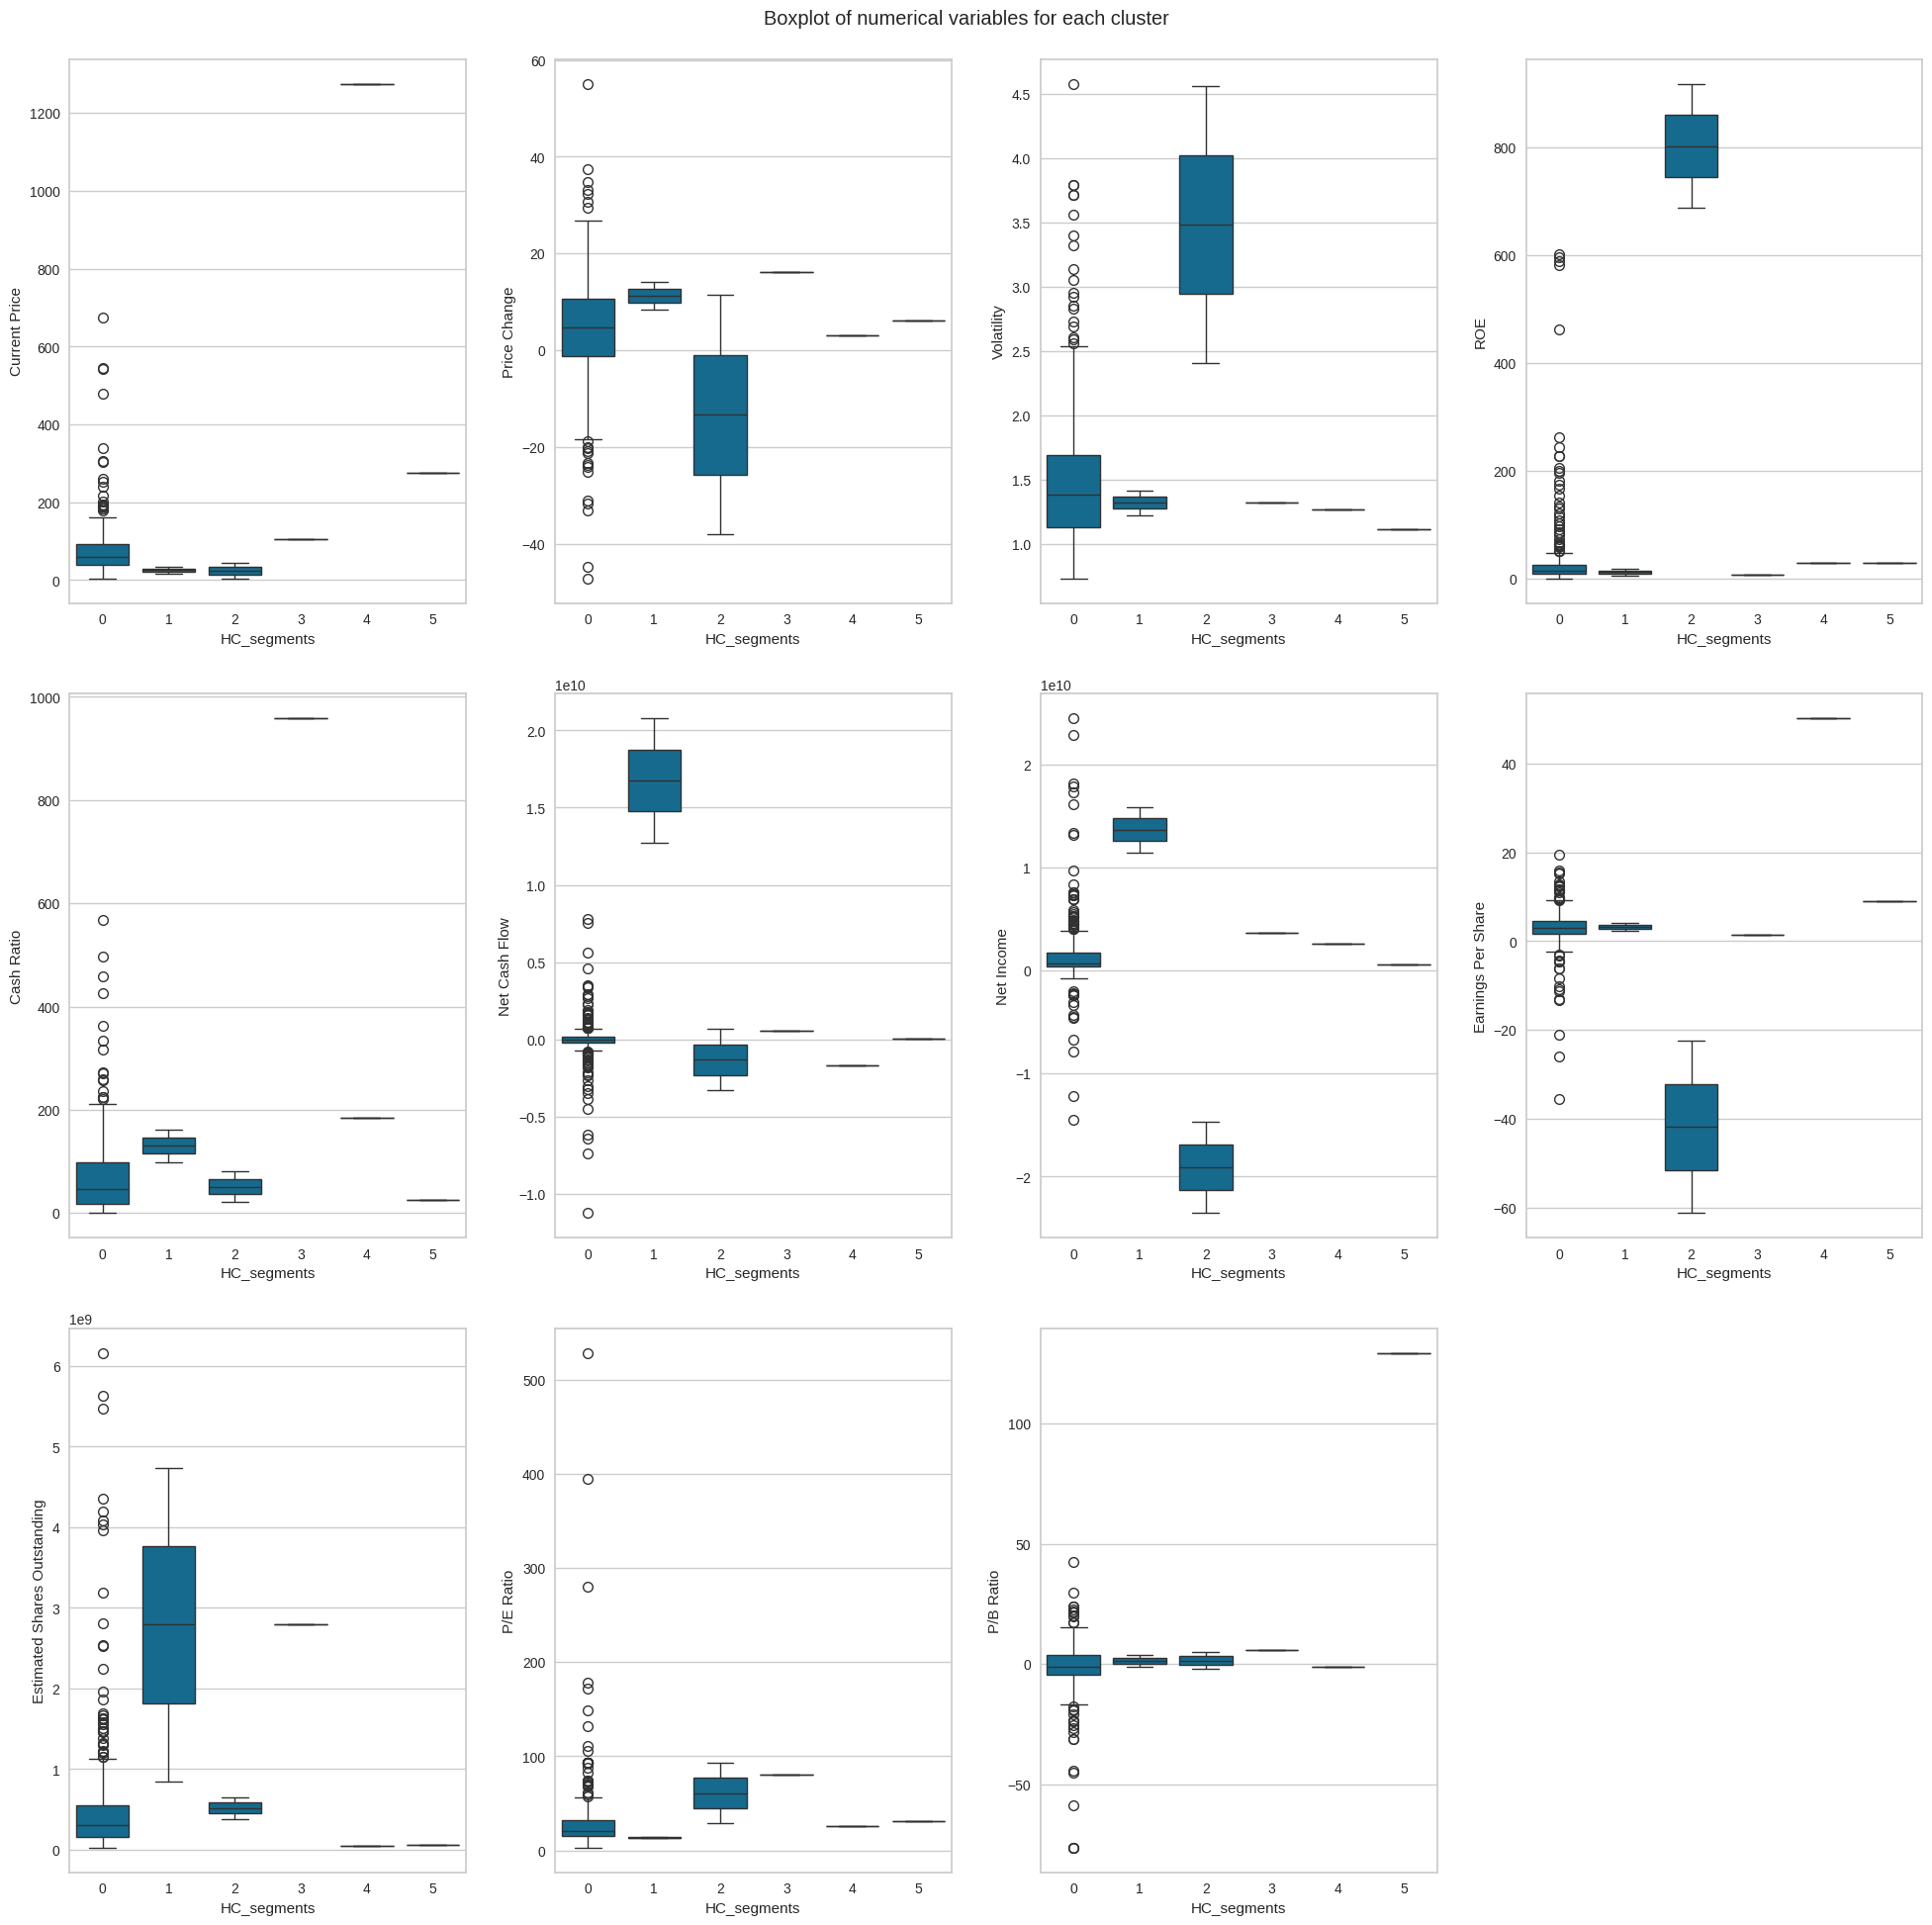

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Observation**

* We see that there are 2 clusters of one security, 3 cluster of two securities, and all the other securities are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.
* Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 5 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

### **Creating model using Ward**

In [ ]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
HCmodel.fit(hc_df)

CPU times: user 8.23 ms, sys: 25 µs, total: 8.25 ms
Wall time: 10 ms


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
%%time
# creating a copy of the original data
df2 = data.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

CPU times: user 1.25 ms, sys: 0 ns, total: 1.25 ms
Wall time: 5.26 ms


### **Cluster Profiling**

In [ ]:
%%time
hc_cluster_profile = df2.groupby("HC_segments").mean()

CPU times: user 3.3 ms, sys: 0 ns, total: 3.3 ms
Wall time: 6.32 ms


In [ ]:
%%time
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

CPU times: user 2.28 ms, sys: 0 ns, total: 2.28 ms
Wall time: 2.29 ms


In [ ]:
%%time
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

CPU times: user 188 µs, sys: 18 µs, total: 206 µs
Wall time: 195 µs


,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


In [ ]:
%%time
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 

In [ ]:
%%time
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

CPU times: user 1.87 ms, sys: 0 ns, total: 1.87 ms
Wall time: 1.84 ms


HC_segments  GICS Sector                
0            Consumer Discretionary          5
             Consumer Staples                1
             Financials                      1
             Health Care                     8
             Information Technology          9
             Materials                       1
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
3            Consumer Discretionary         33
             Consum

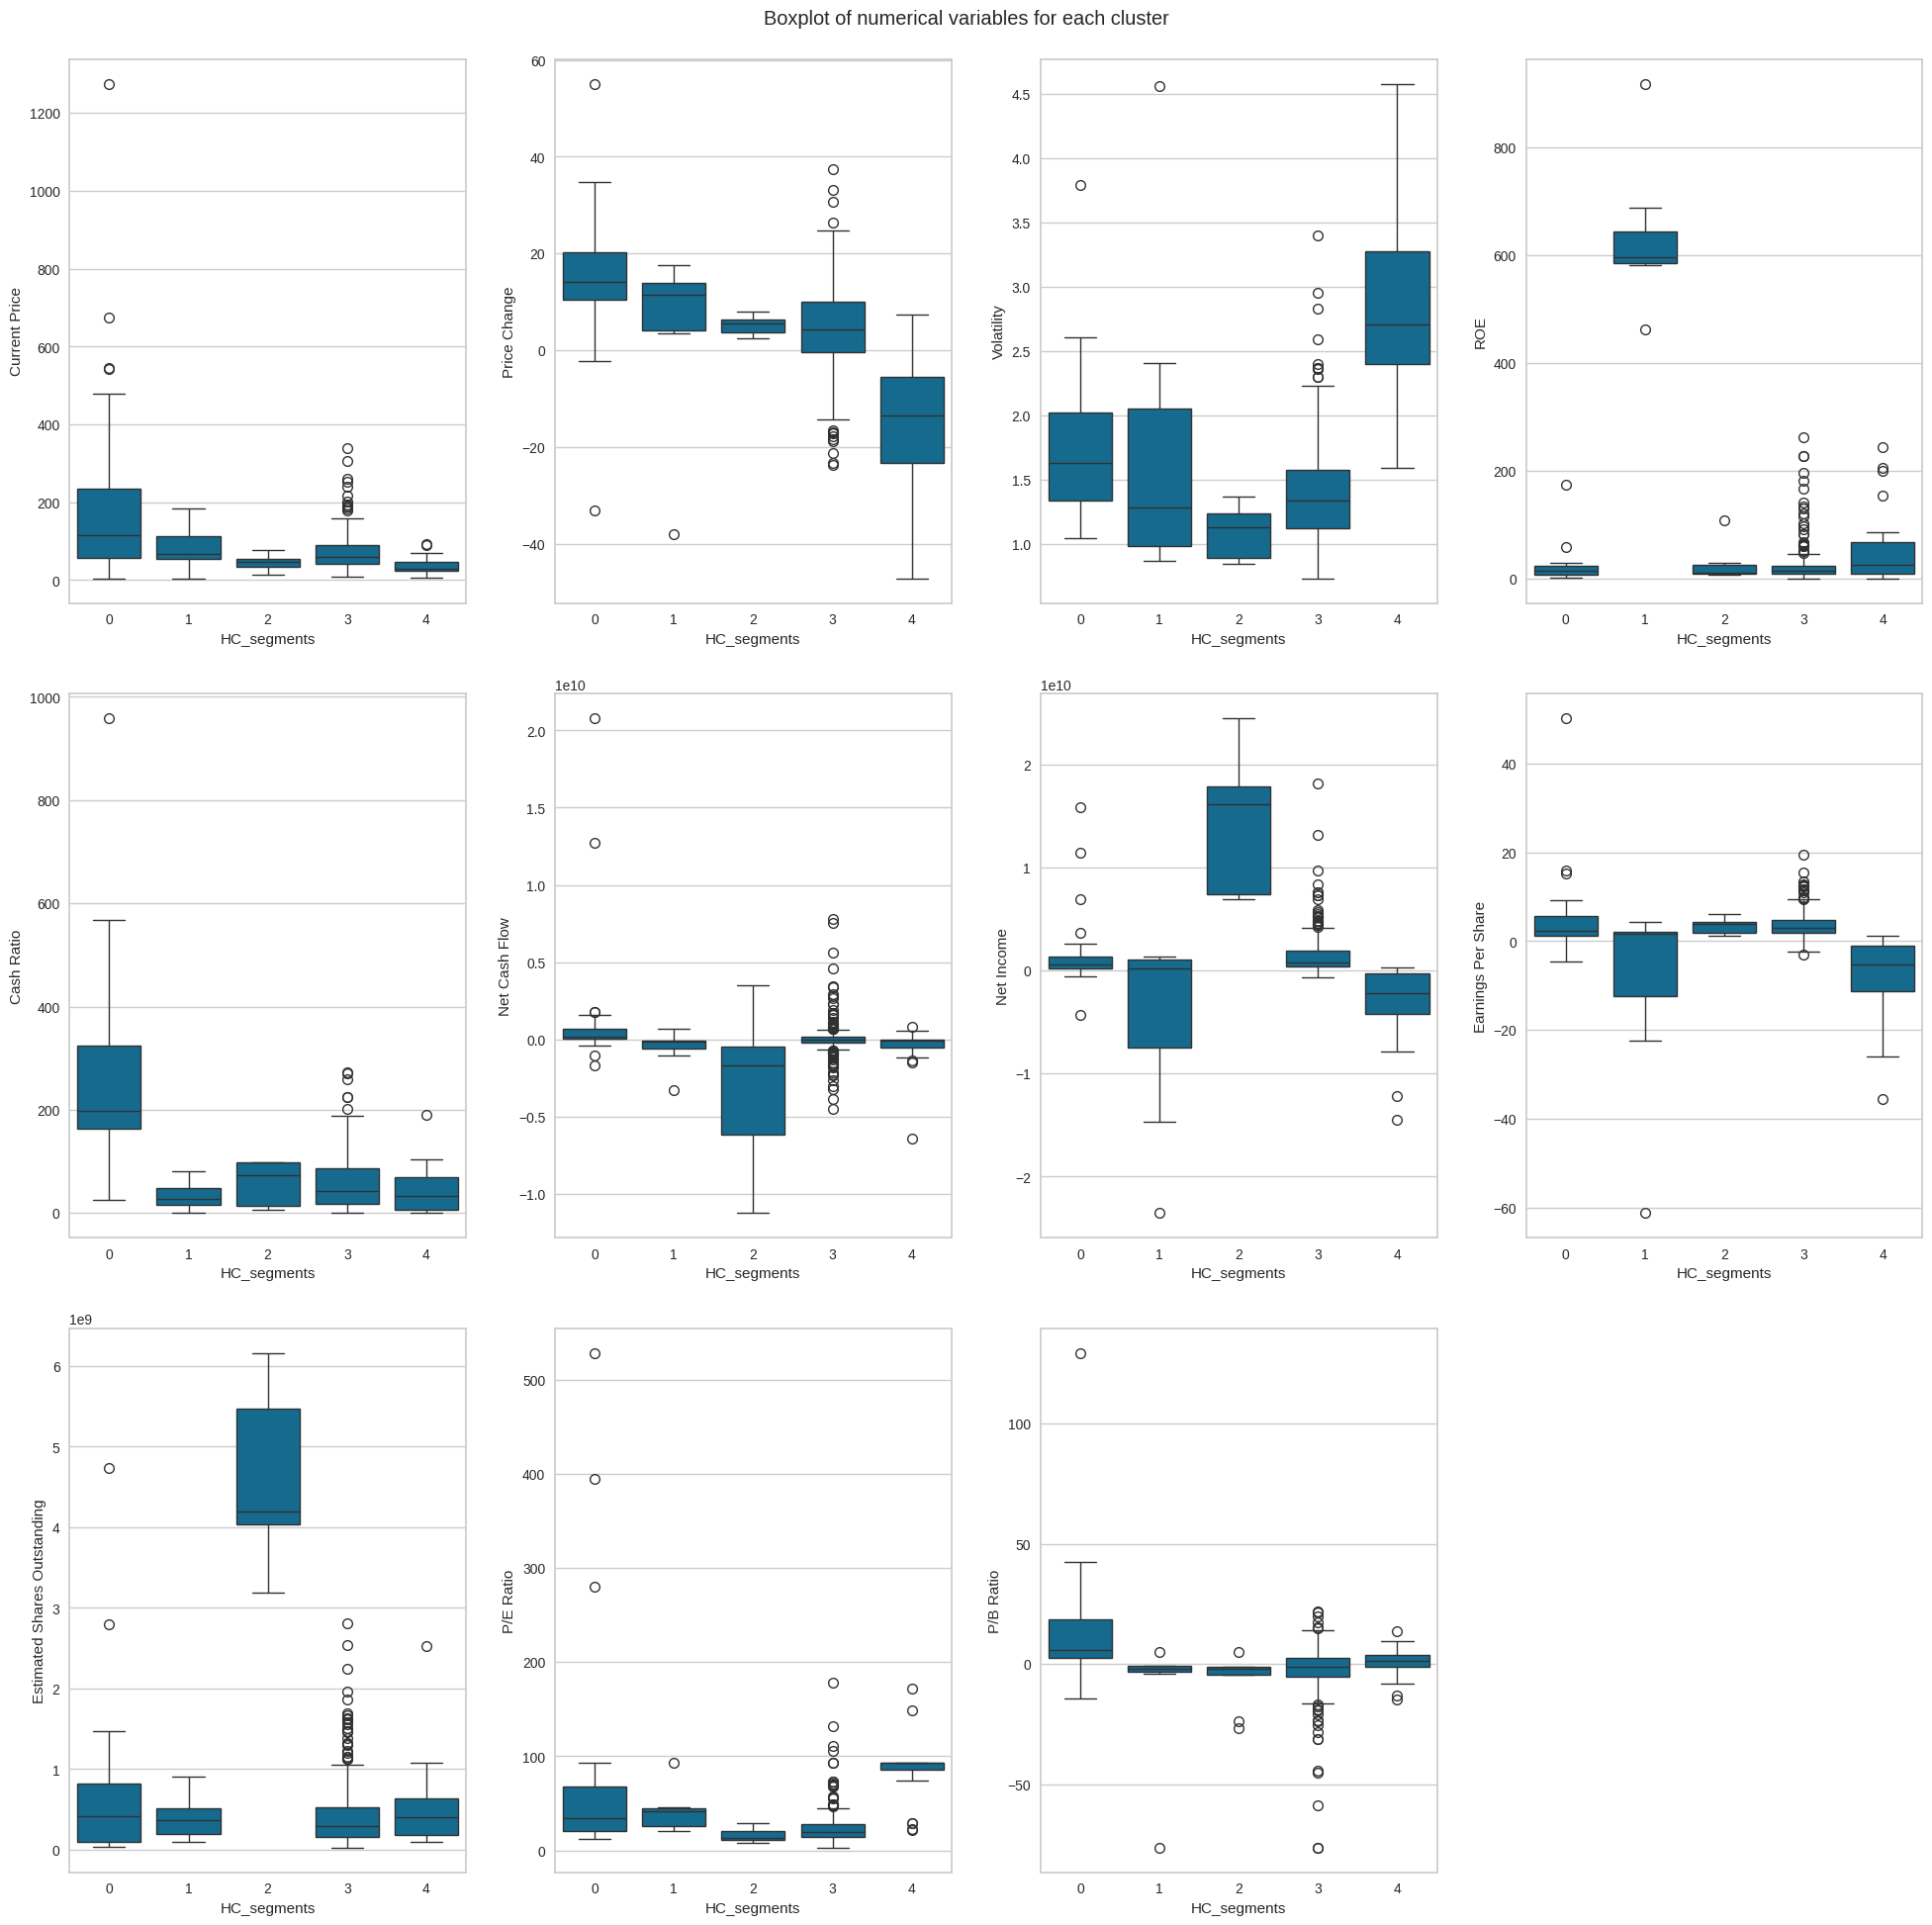

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Observation:**
*****************************************************************************
**Cluster 0:** **Long-Term Investment**

Has about 15 different securities with majority of the portfolio in Healthcare and Information Technology sector companies. This cluster has securities with the highest Current Price, Cash Ratio, Earnings Per Share & P/B ratio and high positive Price Change in last 13 weeks making them an **attractive investement strategy for investors who would like to invest in high performance, stable growth driven companies. This may not be so ideal for first time investors as the high Current Price for the security might put them off.**

*****************************************************************************
**Cluster 1:** **Bonds Investment**

Has about 287 different securities with majority of the portfolio in Industrias, Financials, Consumer Discretionary & Healthcare sector companies. This cluster has huge diversification (~84% of the total securities) and with outliers present in all different segments. **This doesn't seem to be a good portfolio of securites for investors needing a specific investment strategy. This may be ideal for first time investors lacking Stock Market/Investement knowledge and would like to invest in bonds.**
*****************************************************************************
**Cluster 2:** **Retirement Investment**

Has about 9 different securities with majority of the portfolio in Utilities sector companies. This cluster has securities with high Net Income, low Volatility and negative Net Cash Flow suggests securities might be investing a lot in building assets, infrastructure, etc. **Hence, this might be an ideal strategy for long-term investment risk free investors and not so attractive investment for short-term fast money making investors.**
*****************************************************************************
**Cluster 3:** **Short-Term Investment**

Has about 7 different securities with majority of the portfolio in Energy & Consumer Staples sector. This cluster has securities with the hightest ROE, second highest positive Price Change but with also second highest Volatility in the value. It also has highest negative Net Income and Earnings Per Share, making them more riskier. **This might be an ideal strategy for short-term investors looking for quick money.**
*****************************************************************************
**Cluster 4:** **Penny Stocks Investment**

Has about 22 different securities with majority of the portfolio in the Energy sector. This cluster has securities with the high ROE & P/E ratio. Has the lowest average Current Price of securities within other investement portfolio along with highest Volatility, highest negative Price Change, highest negative Net Income & highest negative Earnings Per Share.**This might be an ideal strategy for Penny stock investors, who don't look to invest much into the company but more into the price point and hope for miracles.**
*****************************************************************************

## **K-means vs Hierarchical Clustering**

* **Which clustering technique took less time for execution?**
  * Both K-means and Hierarchical clustering fit the dataset within 1 second (K-means takes a little more milliseconds then Hierarchical)

* **Which clustering technique gave you more distinct clusters, or are they the same?**
  * Both algorithms give a similar distribution in the grouped clusters

* **How many observations are there in the similar clusters of both algorithms?**
  * The clusters identified by K-Means and Hierarchical Clustering are able to group 323 out of 340 securities in an identical fashion as seen below.


* **How many clusters are obtained as the appropriate number of clusters from both algorithms?**
  * We obtained 4 clusters from K-means and 5 clusters from Hierarchical clustering. Seen below are all the unique cluster profiles we obtained:
    * Long-Term Investment
    * Short-Term Investment
    * Retirement Investment
    * Bond Investment
    * Penny Stocks Investment
  * Short-Term Investment cluster profile doesn't exist in the clusters obtained from K-means.

### **Let's see how many observations are there in the similar clusters of both algorithms?**

In [ ]:
pd.crosstab(df1.KM_segments, df2.HC_segments).style.highlight_max(color = 'lightgreen', axis = 0)

HC_segments,0,1,2,3,4
KM_segments,,,,,
0,4,5,0,267,1
1,1,0,9,1,0
2,1,2,0,3,21
3,21,0,0,4,0


**Observation:** The clusters identified by K-Means and Hierarchical Clustering are able to group 323 out of 340 securities in an identical fashion.

## **Dimensionality Reduction using PCA for visualization**

* Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [ ]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [ ]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.3712899567725855

**Observation:** The first two principal components explain 37.12% of the variance in the data.

<Axes: xlabel='Component 1', ylabel='Component 2'>

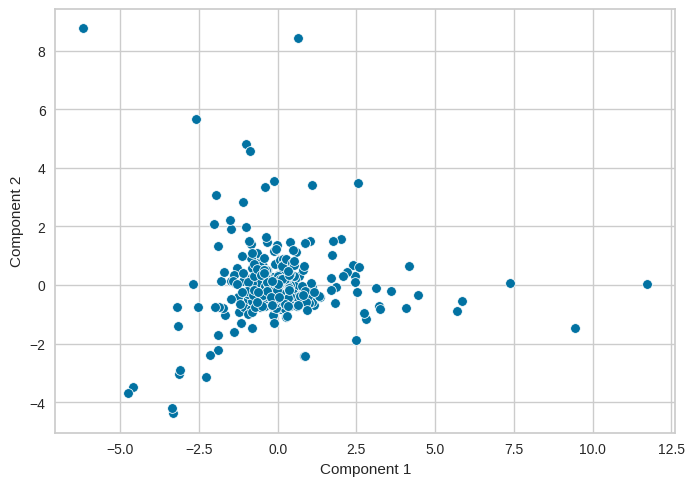

In [ ]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

Let's colour the scatterplot by cluster labels.

### **Scatterplot by cluster labels - K-Means Clustering**

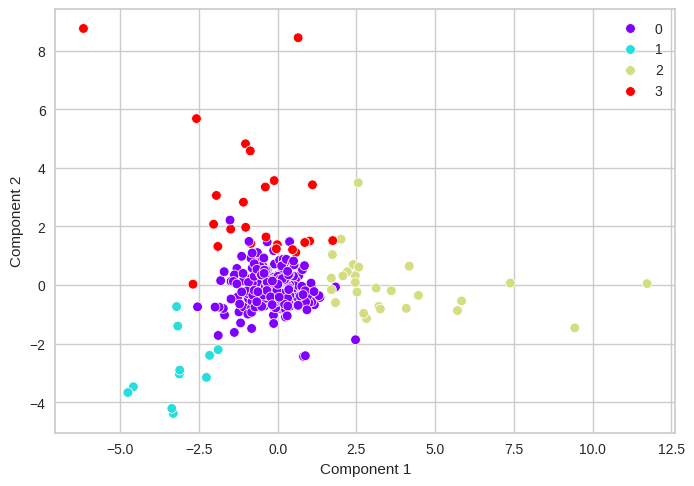

In [ ]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["KM_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

**Observation:** Cluster 0, 1, 2 and 3 are well defined.

### **Scatterplot by cluster labels - Hierarchical Clustering**

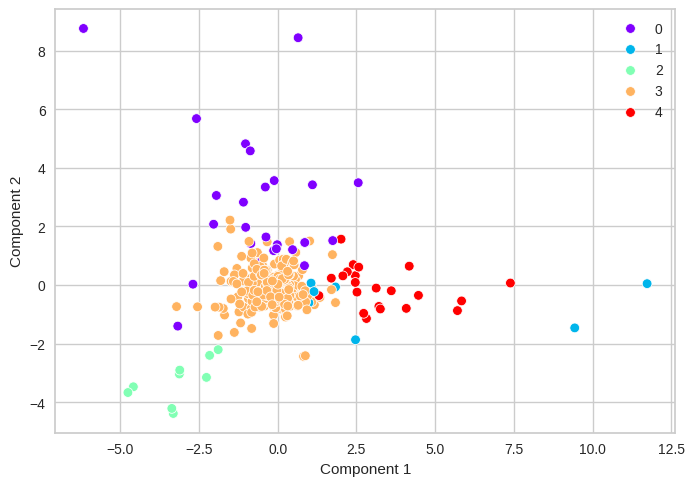

In [ ]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df2["HC_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

**Observation:** Cluster 0, 1, 2, 3 and 4 are well defined.

## **Actionable Insights and Recommendations**

#### **Insights:**

* **Current Price:** The distribution is heavily right skewed with outliers, having minimum value of a stock at ~$\$$4.5 and maximum value of a stock at ~$\$$1,275. As expected, no stock is listed at or around 0 dollars.

* **Price Change:** The distribution has a normal distribution, with a range from -47.12% to 55.05%.


* **Volatility:** The distribution is heavily right skewed with outliers, having standard deviation of stock price as high as 4.58.


* **Return on Equity (ROE):** A higher ROE indicates that a company is able to generate higher profits without needing much capital which may be attractive proposition for investors. The distribution is heavily right skewed with outliers, with the average ROE at ~40 while the median ROE at ~15.

* **Cash Ratio:** While Cash ratio is a measure of the company to pay off short term liabilities with cash & cash equivalents. While a high cash ratio is prefered by investors, a very high cash ratio, may also indicate that cash is not being re invested or is not returning further interest. The distribution is heavily right skewed with outliers, with the average at 70.2 and median at 47.

* **Net Cash Flow:** Net cash flow is a profitability metric that represents the amount of money produced or lost by a business during a given period. The distribution is slightly right skewed with heavy amount of outliers, with the average Net Cash Flow at ~$\$$55M while median Net Cash Flow at ~$\$$2M.

* **Net Income:** Net income is synonymous with a company's profit for the accounting period. In other words, net income includes all of the costs and expenses that a company incurs, which are subtracted from revenue. Net income is often called "the bottom line" due to its positioning at the bottom of the income statement. The distribution is slightly left skewed with heavy amount of outliers, with the average Net Income at ~$\$$1.5B while median Net Income at $\$$0.7B.

* **Earnings Per Share (EPS):** Earnings per share (EPS) is a company's net income divided by its outstanding shares of common stock. Net income is the income available to all shareholders after a company's costs and expenses are accounted for. The formula uses the average outstanding shares. The distribution is slightly left skewed with heavy amount of outliers, with the average EPS at 2.77 while median at 2.89.

* **Estimated Shares Outstanding:** The number of shares outstanding for a company is equal to the number of shares issued minus the number of shares held in the company's treasury. If a company buys back its own stock, those repurchased shares are called treasury stock. The distribution is highly right skewed with heavy amount of outliers, with the number of shares outstanding can (and usually does) fluctuate over time. The average Estimated Shares Outstanding is 577M while median is 309M.

* **P/E Ratio:** The P/E ratio can help investors understand what they think of a stock. It's calculated by dividing the price of a stock by the company's annual earnings per share. A high P/E ratio can mean that a stock's price is high relative to earnings and possibly overvalued. However, a high P/E ratio does not necessarily mean a stock is overvalued. The distribution is highly right skewed with heavy amount of outliers, with the average P/E ratio at ~33 and median at ~21

* **P/B Ratio:** The price-to-book (P/B) ratio is a financial metric that compares a company's current market value to its book value. A P/B ratio of one means that the stock price is trading in line with the book value of the company. A lower P/B ratio can sometimes indicate that the stock is at a reasonable valuation. A high P/B ratio suggests a stock could be overvalued. Value investors typically consider P/B ratios under 1.0 to be solid investments. The distribution is slightly right skewed with heavy amount of outliers, with the average P/B ratio at ~ -1.71 and median at ~ -1.06


#### **Conclusions:**
As we are aware, investing in stocks doesn't gurantee returns. With high upsides, mostly modest returns, and the omnipresent possibility that the value of the stock may drop unexpectedly (i.e., various micro and macro economic factors). All of these variables contain a few or several outliers; however, none of these values appear to be unrealistic given the nature of stock prices and historical expectations.

Out of 340 securities in our data set, both clustering methods clustered 323 securities in a similar fashion with 17 securities being clustered differently. The industry segregation into clusters yielded similar results across both algorithms. PCA performed for both clustering techniques yielded similar cluster densities in 2D space

#### **Recommendations:**

Below are the recommended Cluster profiles based on the Hierarchical clustering:

**Cluster 0: Long-Term Investment** is an attractive investement strategy for investors who would like to invest in high performance, stable growth driven companies.

**Cluster 1: Bonds Investment** is an ideal strategy for first time investors those who are lacking stock market investement knowledge and investing in bonds is best.

**Cluster 2: Retirement Investment** is an ideal strategy for customers wanting to invest capital that is risk free.

**Cluster 3: Short-Term Investment** is an an ideal strategy for short-term investors looking for quick money.

**Cluster 4: Penny Stocks Investment** is an ideal strategy for Penny stock investors, who don't look to invest much into the company but more sensitive to the entry price point and hope for miracles.

However, it is important to keep in mind that stock market is often volatile, and past indicators may not always indicate future trends. Hence, we recommend dynamic clustering (as more data is added each day) & movement of stocks across cluster groups due to changing market conditions needs to be further analyzed for making better predictions.

